In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import plotly.express as px
from ipywidgets import interact, Dropdown, Select
import ipywidgets as widgets
import plotly.graph_objects as go
import seaborn as sns
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)


from sklearn.feature_selection import mutual_info_classif
%matplotlib inline
pd.set_option("display.max_columns",100)
pd.set_option('display.max_rows',100)

from pylab import mpl 
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 为了显示负号正常

import warnings
warnings.filterwarnings("ignore")


# 数据总览

In [2]:
# 读取CSV文件
file_path = "../../data/process_data.csv"
df = pd.read_csv(file_path)
data = df

# 指定需要统计的列名
column_name = 'RES'

# 统计指定列中0和1的数量
count_0 = df[column_name].eq(0).sum()
count_1 = df[column_name].eq(1).sum()

# 打印结果
print(f"在列 '{column_name}' 中，0 的数量为: {count_0}")
print(f"在列 '{column_name}' 中，1 的数量为: {count_1}")


在列 'RES' 中，0 的数量为: 15207
在列 'RES' 中，1 的数量为: 793


In [3]:
# 删除“个人编码”特征列
df.drop(['个人编码'], axis=1, inplace=True)

# 统计特征的数量
num_features = len(df.columns)

# 打印特征数量结果
print(f"样本中的特征数量为: {num_features-1}")

样本中的特征数量为: 80


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 81 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   一天去两家医院的天数         16000 non-null  int64  
 1   就诊的月数              16000 non-null  int64  
 2   月就诊天数_MAX          16000 non-null  int64  
 3   月就诊天数_AVG          16000 non-null  float64
 4   月就诊医院数_MAX         16000 non-null  int64  
 5   月就诊医院数_AVG         16000 non-null  float64
 6   就诊次数_SUM           16000 non-null  int64  
 7   月就诊次数_MAX          16000 non-null  int64  
 8   月就诊次数_AVG          16000 non-null  float64
 9   月统筹金额_MAX          16000 non-null  float64
 10  月统筹金额_AVG          16000 non-null  float64
 11  月药品金额_MAX          16000 non-null  float64
 12  月药品金额_AVG          16000 non-null  float64
 13  医院_就诊天数_MAX        16000 non-null  int64  
 14  医院_就诊天数_AVG        16000 non-null  float64
 15  医院_统筹金_MAX         16000 non-null  float64
 16  医院_统筹金_AVG         160

In [5]:
# 使用describe方法进行描述性统计
description = df.describe(include='all')

# 打印描述性统计结果
print("描述性统计结果：")
print(description)

描述性统计结果：
         一天去两家医院的天数         就诊的月数     月就诊天数_MAX     月就诊天数_AVG    月就诊医院数_MAX  \
count  16000.000000  16000.000000  16000.000000  16000.000000  16000.000000   
mean       1.883875      5.817812      7.824438      5.854813      2.099000   
std        5.227365      0.702069      4.193234      3.377273      0.947038   
min        0.000000      1.000000      1.000000      1.000000      1.000000   
25%        0.000000      6.000000      5.000000      3.500000      1.000000   
50%        0.000000      6.000000      7.000000      5.166667      2.000000   
75%        0.000000      6.000000     10.000000      7.333333      3.000000   
max      108.000000      7.000000     31.000000     30.000000      8.000000   

         月就诊医院数_AVG      就诊次数_SUM     月就诊次数_MAX     月就诊次数_AVG     月统筹金额_MAX  \
count  16000.000000  16000.000000  16000.000000  16000.000000  16000.000000   
mean       1.735954     36.818438      8.419250      6.264291   3943.185445   
std        0.724497     23.656539      5.1

In [6]:
# 对欺诈与非欺诈分别进行描述性统计分析
desc_stats_fraud = df[df['RES'] == 1].describe()
desc_stats_nonfraud = df[df['RES'] == 0].describe()

print("欺诈:\n",desc_stats_fraud)
print("______________")
print("非欺诈：\n",desc_stats_nonfraud)

欺诈:
        一天去两家医院的天数       就诊的月数   月就诊天数_MAX   月就诊天数_AVG  月就诊医院数_MAX  月就诊医院数_AVG  \
count  793.000000  793.000000  793.000000  793.000000  793.000000  793.000000   
mean     7.609079    5.568726   12.895334    9.620405    2.578815    2.095451   
std     14.773407    1.090885    7.462390    6.211821    1.285763    1.025574   
min      0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      0.000000    6.000000    6.000000    3.833333    2.000000    1.166667   
50%      0.000000    6.000000   13.000000    8.833333    2.000000    2.000000   
75%      9.000000    6.000000   18.000000   14.166667    3.000000    2.666667   
max    108.000000    7.000000   31.000000   28.833333    8.000000    7.000000   

         就诊次数_SUM   月就诊次数_MAX   月就诊次数_AVG     月统筹金额_MAX     月统筹金额_AVG  \
count  793.000000  793.000000  793.000000    793.000000    793.000000   
mean    62.923077   15.756620   11.206735   8598.079168   5260.668820   
std     51.109265   11.946959    8.458459   65

# 空值、异常值
- 没有空值，部分特征有很多为0的值

In [7]:
# 分别统计欺诈（RES=1）和非欺诈（RES=0）中特征列含0的个数
fraud_zero_counts = (df[df['RES'] == 1] == 0).sum()
non_fraud_zero_counts = (df[df['RES'] == 0] == 0).sum()

# 筛选出包含0的特征
fraud_zero_counts = fraud_zero_counts[fraud_zero_counts > 0]
non_fraud_zero_counts = non_fraud_zero_counts[non_fraud_zero_counts > 0]

print("RES=1:\n",fraud_zero_counts)
print("________________________")
print("RES=0:\n",non_fraud_zero_counts)

RES=1:
 一天去两家医院的天数           480
月统筹金额_MAX              1
月统筹金额_AVG              1
医院_统筹金_MAX             1
医院_统筹金_AVG             1
住院天数_SUM             793
统筹支付金额_SUM             1
可用账户报销金额_SUM           1
药品费自费金额_SUM          115
贵重药品发生金额_SUM         195
中成药费发生金额_SUM          94
中草药费发生金额_SUM         447
检查费发生金额_SUM          164
检查费自费金额_SUM          656
检查费申报金额_SUM          164
贵重检查费金额_SUM          681
治疗费自费金额_SUM          676
手术费发生金额_SUM          786
手术费自费金额_SUM          790
手术费申报金额_SUM          788
床位费发生金额_SUM          724
床位费申报金额_SUM          726
医用材料发生金额_SUM         188
高价材料发生金额_SUM         776
医用材料费自费金额_SUM        568
成分输血申报金额_SUM         792
其它发生金额_SUM           481
其它申报金额_SUM           791
一次性医用材料申报金额_SUM      231
起付线标准金额_MAX          784
起付标准以上自负比例金额_SUM       4
医疗救助个人按比例负担金额_SUM    645
最高限额以上金额_SUM         793
基本统筹基金支付金额_SUM         4
公务员医疗补助基金支付金额_SUM    771
城乡救助补助金额_SUM         598
基本个人账户支付_SUM         315
补助审批金额_SUM           596
医疗救助医院申请_SUM         644
残疾军人补助_SUM       

# 统计分析

## 就诊行为

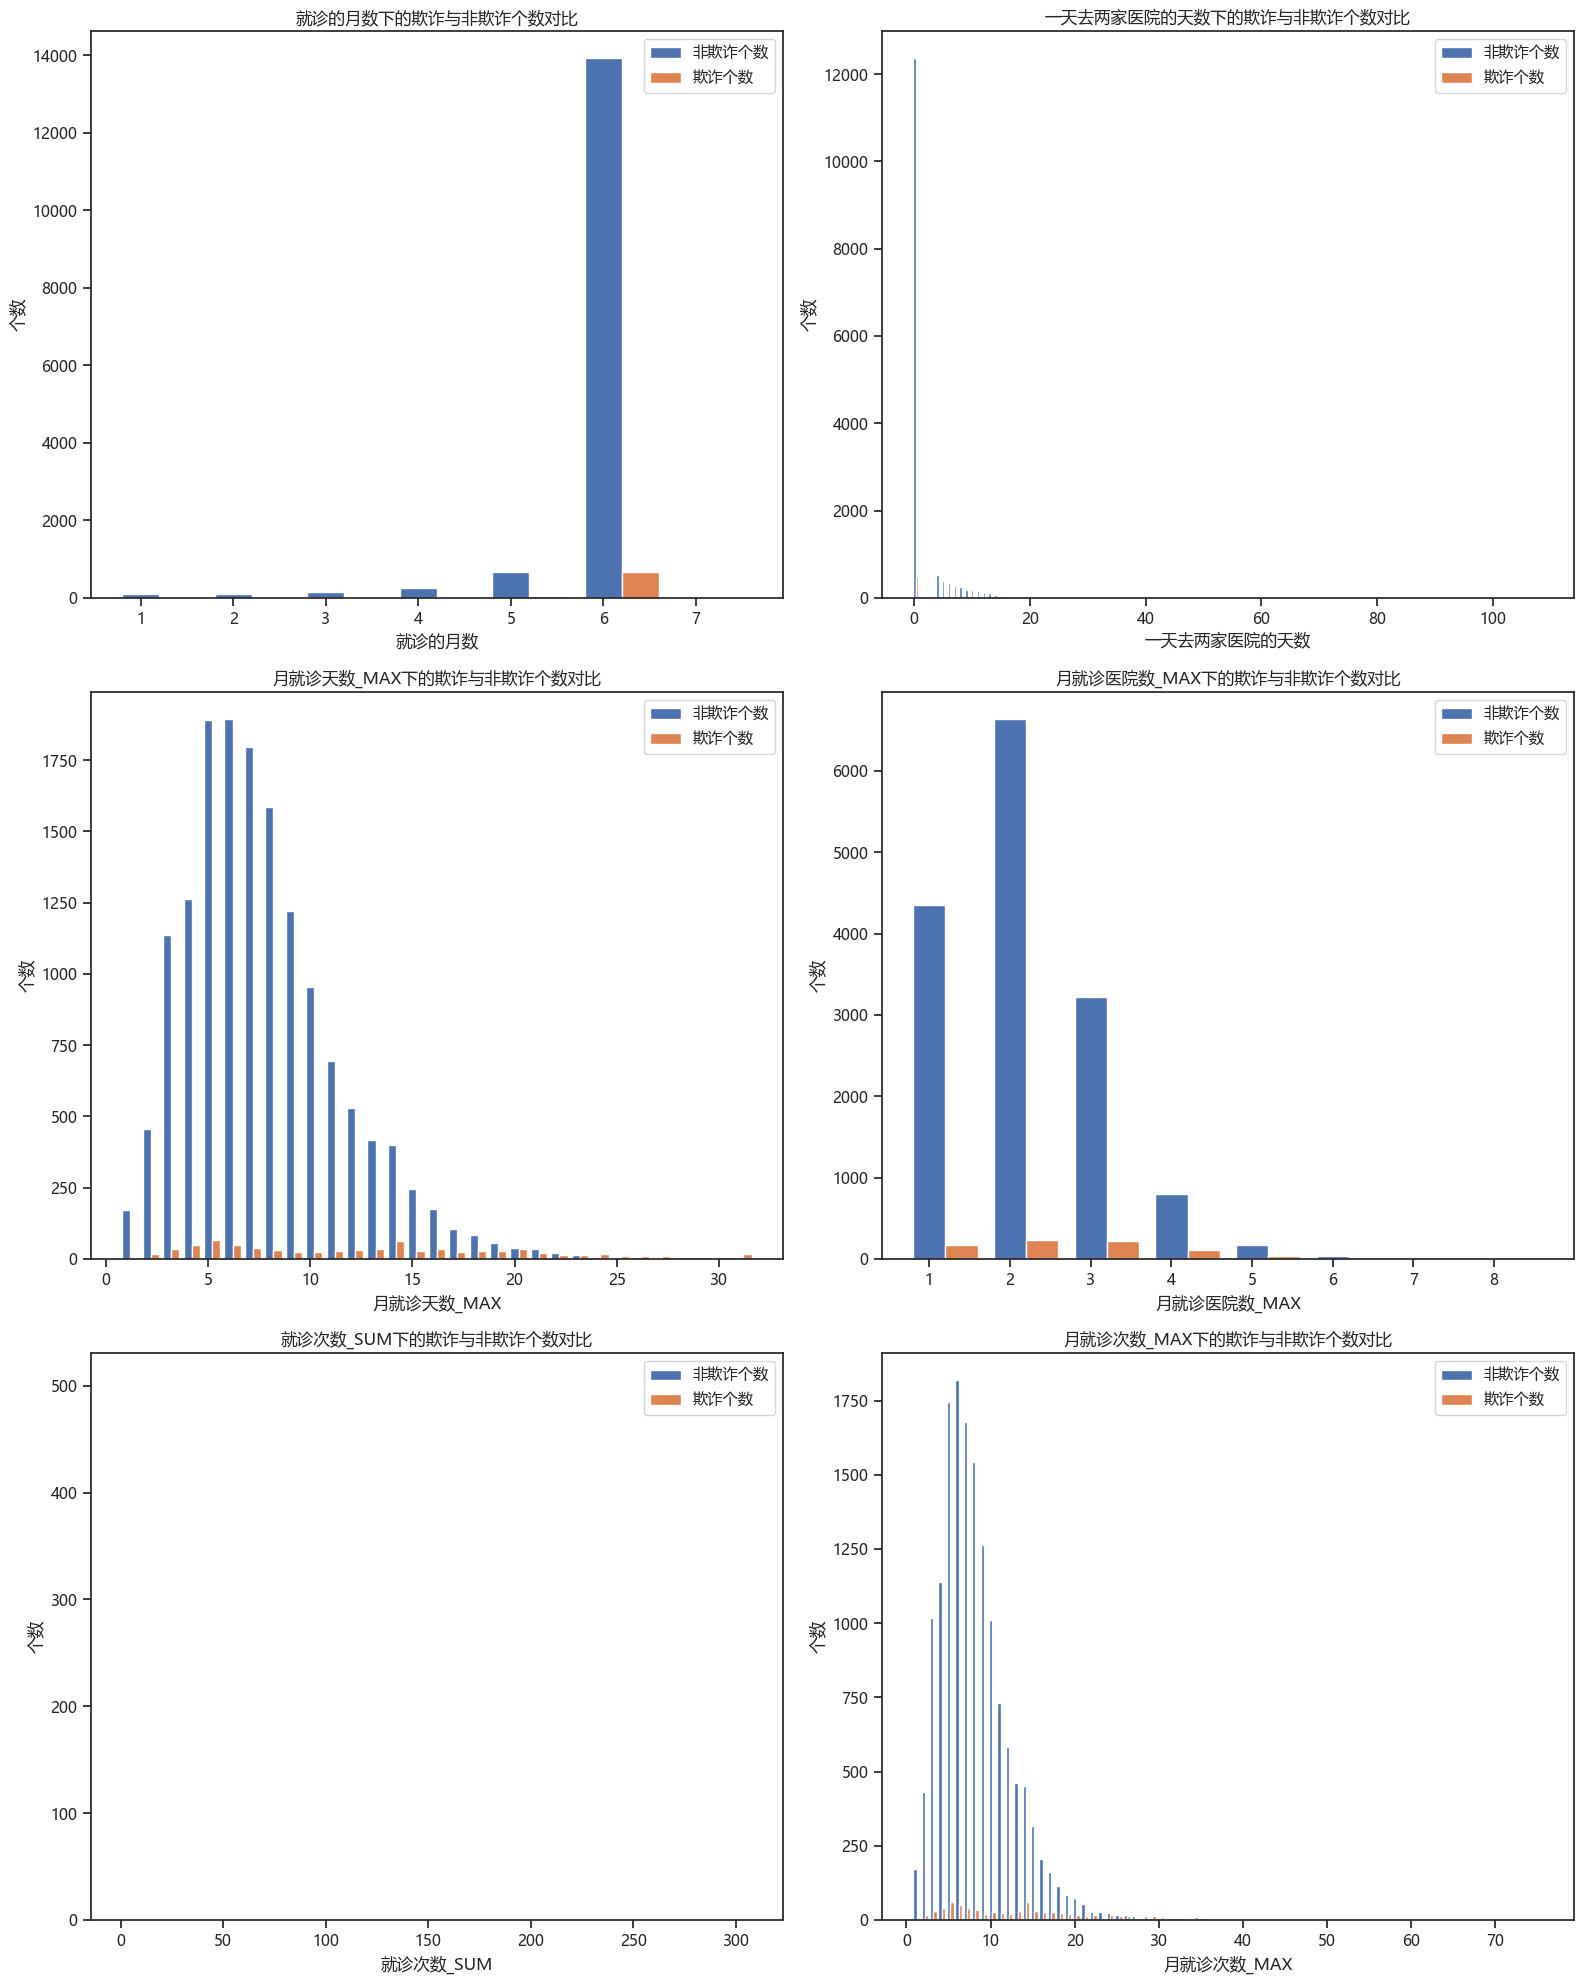

In [8]:
columns_of_interest = ['就诊的月数', '一天去两家医院的天数', '月就诊天数_MAX', '月就诊医院数_MAX', '就诊次数_SUM', '月就诊次数_MAX']
# columns_of_interest = data.columns[1:9]

# 为多个分情节创建数字
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 20))
axes = axes.flatten()  # 使其扁平化，以便于索引

for i, col in enumerate(columns_of_interest):
    # 按每列分组并计算 RES 值的出现次数
    grouped_data = data.groupby([col, 'RES']).size().unstack(fill_value=0)
    grouped_data.columns = ['非欺诈个数', '欺诈个数']

    axes[i].bar(grouped_data.index, grouped_data['非欺诈个数'], width=0.4, label='非欺诈个数', align='center')
    axes[i].bar(grouped_data.index + 0.4, grouped_data['欺诈个数'], width=0.4, label='欺诈个数', align='center')

    axes[i].set_xlabel(col)
    axes[i].set_ylabel('个数')
    axes[i].set_title(f'{col}下的欺诈与非欺诈个数对比')
    axes[i].legend()

plt.tight_layout()
plt.show()


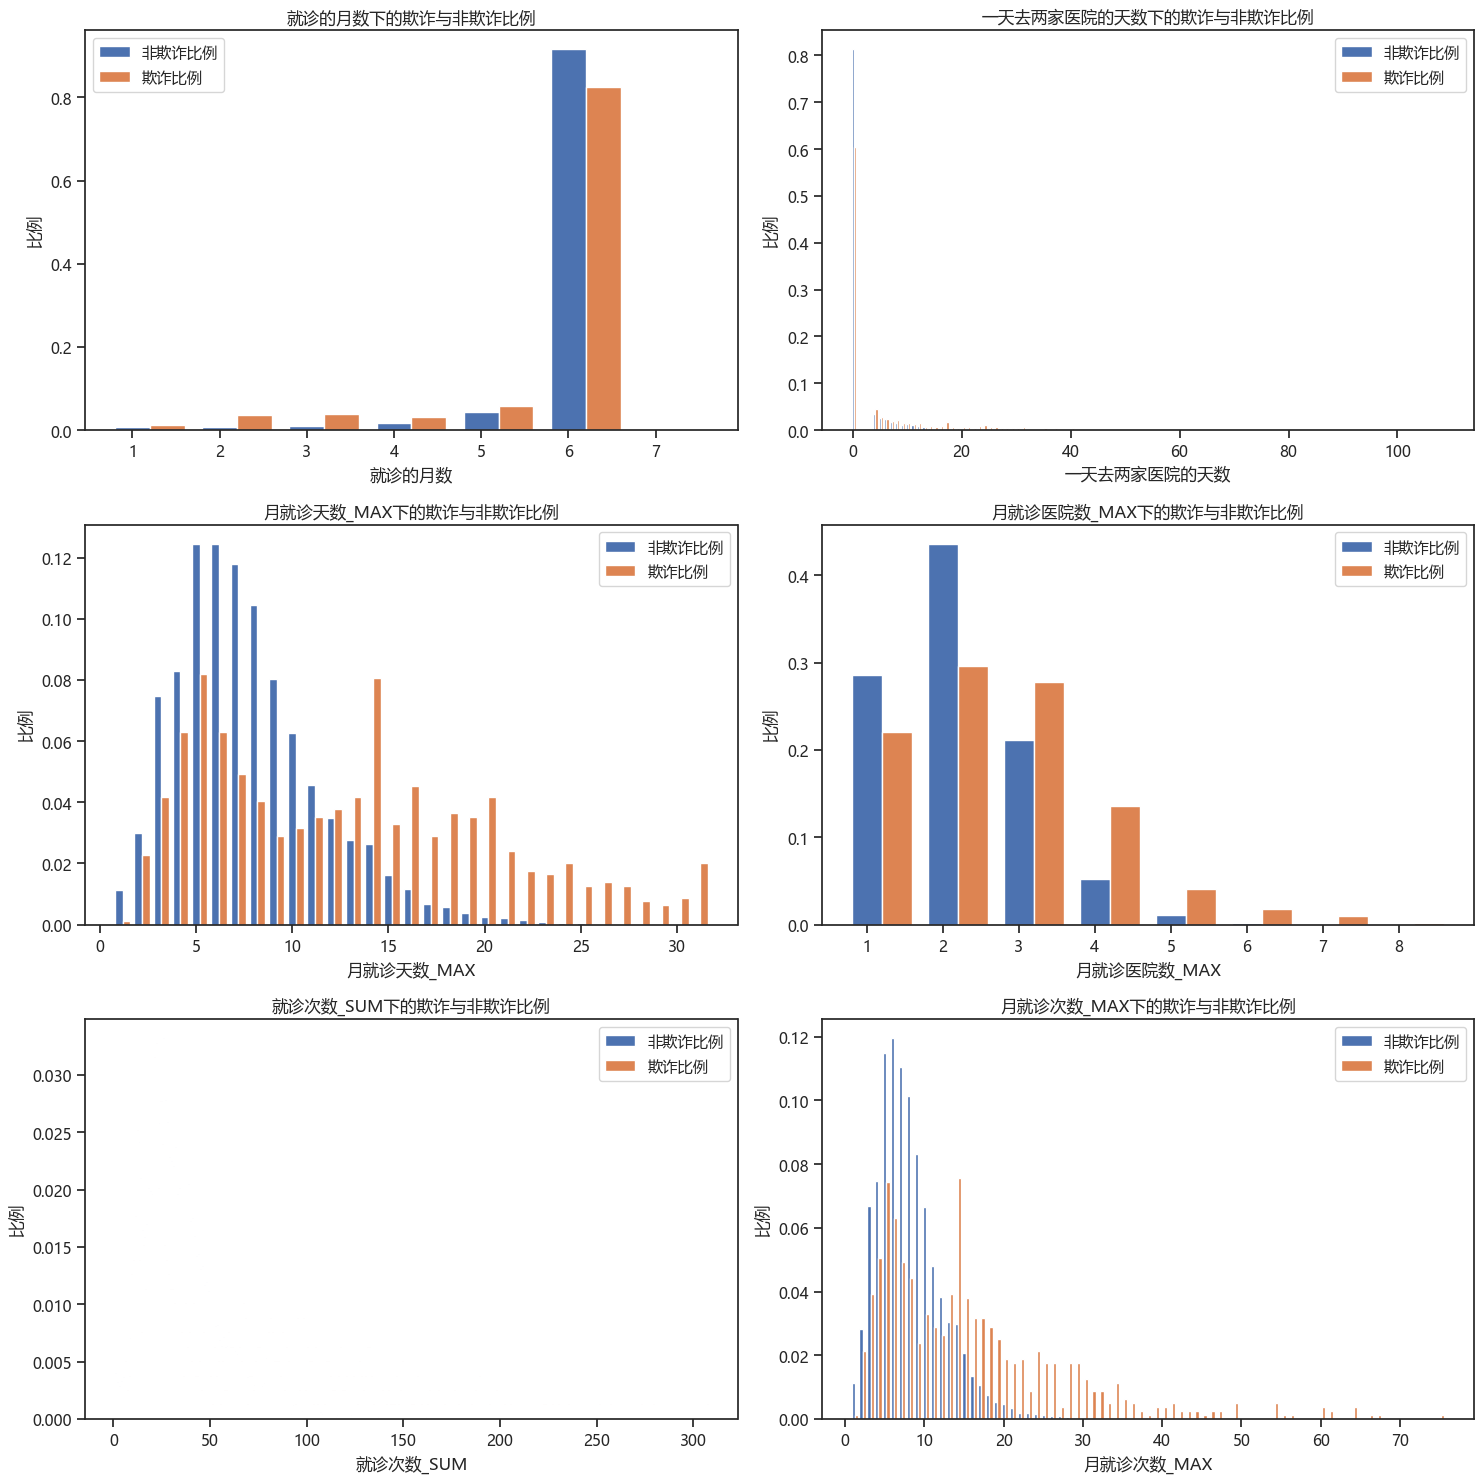

{'就诊的月数': RES        欺诈比例     非欺诈比例
就诊的月数                    
1      0.011349  0.006773
2      0.035309  0.006970
3      0.037831  0.009995
4      0.031526  0.016637
5      0.058008  0.044322
6      0.824716  0.915171
7      0.001261  0.000132, '一天去两家医院的天数': RES             欺诈比例     非欺诈比例
一天去两家医院的天数                    
0           0.605296  0.812784
4           0.045397  0.034458
5           0.027743  0.025449
6           0.023960  0.023016
7           0.018916  0.017032
8           0.021438  0.016111
9           0.015132  0.011902
10          0.015132  0.012494
11          0.012610  0.009930
12          0.015132  0.008680
13          0.007566  0.007365
14          0.008827  0.004537
15          0.006305  0.002893
16          0.008827  0.002499
17          0.016393  0.001644
18          0.007566  0.001907
19          0.003783  0.001381
20          0.006305  0.000921
21          0.007566  0.000855
22          0.003783  0.000658
23          0.008827  0.000263
24          0.010088  0.0006

In [9]:
total_fraudulent = data['RES'].sum()
total_non_fraudulent = len(data) - total_fraudulent

# 计算比例并绘制曲线的函数
def plot_proportion_and_calculate(data, column, total_fraudulent, total_non_fraudulent):
    # 按列分组并计算 RES 值的出现次数
    grouped_data = data.groupby([column, 'RES']).size().unstack(fill_value=0)
    
    # Calculating the proportion
    grouped_data['欺诈比例'] = grouped_data[1] / total_fraudulent
    grouped_data['非欺诈比例'] = grouped_data[0] / total_non_fraudulent

    return grouped_data[['欺诈比例', '非欺诈比例']]

# 为多个分计划创建一个数字
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.flatten()  # Flatten to easily index them

proportions = {}

# 计算比例并绘制每一列的图表
for i, col in enumerate(columns_of_interest):
    prop = plot_proportion_and_calculate(data, col, total_fraudulent, total_non_fraudulent)
    proportions[col] = prop

    # 绘图
    axes[i].bar(prop.index, prop['非欺诈比例'], width=0.4, label='非欺诈比例', align='center')
    axes[i].bar(prop.index + 0.4, prop['欺诈比例'], width=0.4, label='欺诈比例', align='center')

    # 设置标签和标题
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('比例')
    axes[i].set_title(f'{col}下的欺诈与非欺诈比例')
    axes[i].legend()

# 调整布局
plt.tight_layout()
plt.show()

print(proportions)


- 一天去两家医院的天数是否超过4
- 月就诊天数是否超过14
- 月就诊医院数是否超过3
- 就诊总次数是否大于60
- 月就诊次数最大值是否超过15

### 就诊欺诈系数

计算医院编码_NN中欺诈的占比：比如医院编号为3，欺诈次数为12，非欺诈次数为12，其就诊欺诈系数为12/(12+36)=0.25

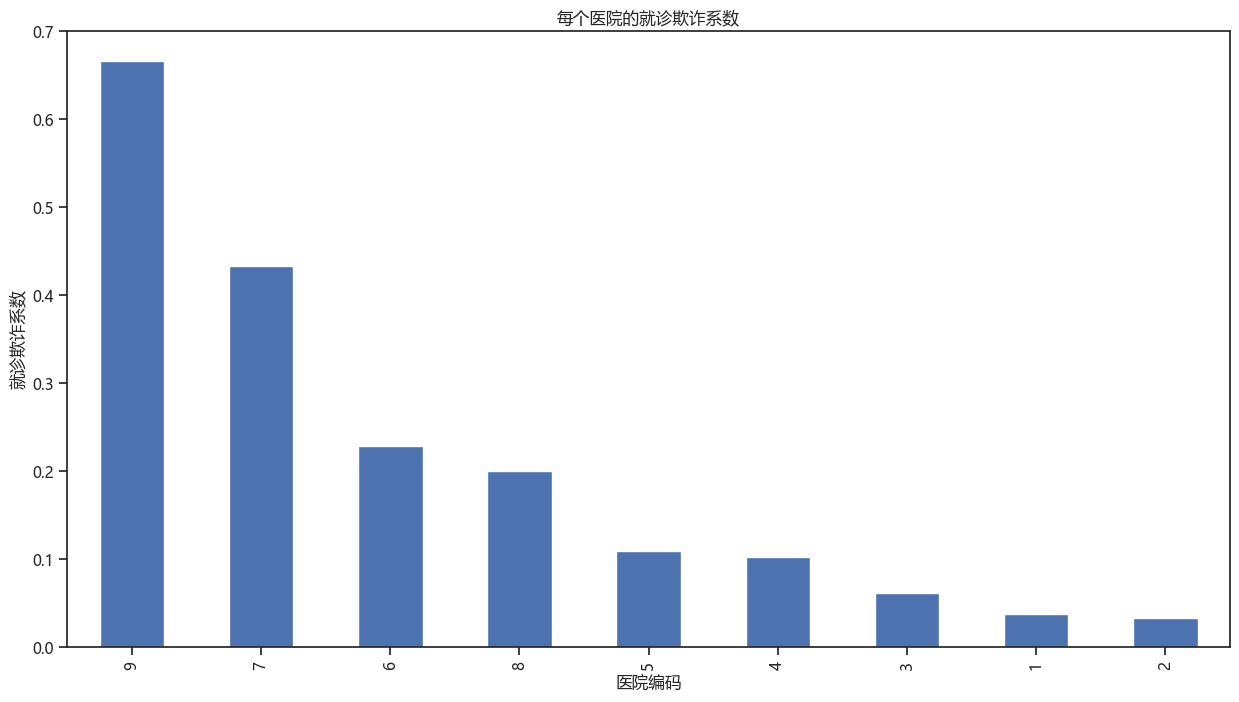

医院编码_NN
9    0.666667
7    0.433333
6    0.228916
8    0.200000
5    0.109422
4    0.102395
3    0.061547
1    0.038050
2    0.032950
dtype: float64

In [10]:
# 计算每个医院的就诊欺诈系数
fraud_counts = data[data['RES'] == 1].groupby('医院编码_NN').size()
total_counts = data.groupby('医院编码_NN').size()
fraud_ratio = fraud_counts / total_counts

# 处理可能出现的NaN值（当医院没有欺诈记录时）
fraud_ratio = fraud_ratio.fillna(0)

# 输出计算结果
fraud_ratio_sorted = fraud_ratio.sort_values(ascending=False)

# 可视化结果
plt.figure(figsize=(15, 8))
fraud_ratio_sorted.plot(kind='bar')
plt.title('每个医院的就诊欺诈系数')
plt.xlabel('医院编码')
plt.ylabel('就诊欺诈系数')
plt.show()

fraud_ratio_sorted.head(10)  # 显示前10个医院的欺诈系数


In [11]:
hospital_codes_fraud_counts = data[data['RES'] == 1]['医院编码_NN'].value_counts()

# 计算非欺诈类别中每个医院代码的出现次数
hospital_codes_nonfraud_counts = data[data['RES'] == 0]['医院编码_NN'].value_counts()

# 显示两个类别的计数
hospital_codes_fraud_counts, hospital_codes_nonfraud_counts

(医院编码_NN
 3    222
 2    209
 1    167
 4    124
 5     36
 6     19
 7     13
 9      2
 8      1
 Name: count, dtype: int64,
 医院编码_NN
 2    6134
 1    4222
 3    3385
 4    1087
 5     293
 6      64
 7      17
 8       4
 9       1
 Name: count, dtype: int64)

### 诊断欺诈系数

In [12]:
fraud_counts_diagnosis = data[data['RES'] == 1].groupby('出院诊断病种名称_NN').size()
total_counts_diagnosis = data.groupby('出院诊断病种名称_NN').size()

# 直接计算欺诈次数与总次数的比例
simple_fraud_ratio_diagnosis = fraud_counts_diagnosis / total_counts_diagnosis

# 处理可能出现的NaN值
simple_fraud_ratio_diagnosis = simple_fraud_ratio_diagnosis.fillna(0)

# 对结果进行排序
simple_fraud_ratio_diagnosis_sorted = simple_fraud_ratio_diagnosis.sort_values(ascending=False)

# 合并欺诈次数和非欺诈次数
fraud_non_fraud_counts_diagnosis = pd.DataFrame({
    'Fraud Counts': fraud_counts_diagnosis,
    'Non-Fraud Counts': total_counts_diagnosis - fraud_counts_diagnosis,
    'Fraud Ratio': simple_fraud_ratio_diagnosis
})

fraud_non_fraud_counts_diagnosis_sorted = fraud_non_fraud_counts_diagnosis.sort_values(by='Fraud Ratio', ascending=False)

In [13]:
fraud_non_fraud_counts_diagnosis_sorted.head(30)

,Fraud Counts,Non-Fraud Counts,Fraud Ratio
出院诊断病种名称_NN,,,
39,1.0,0.0,1.000000
34,1.0,0.0,1.000000
32,3.0,0.0,1.000000
28,1.0,0.0,1.000000
25,2.0,0.0,1.000000
23,3.0,0.0,1.000000
21,3.0,0.0,1.000000
22,4.0,1.0,0.800000
17,16.0,14.0,0.533333


## 费用基础

### 药品金额

In [14]:
# 分布

df[['月药品金额_MAX','月药品金额_AVG','医院_药品_MAX','医院_药品_AVG','药品费发生金额_SUM',
    '药品费自费金额_SUM','药品费申报金额_SUM','贵重药品发生金额_SUM','中成药费发生金额_SUM',
    '中草药费发生金额_SUM'
    ]].describe()

,月药品金额_MAX,月药品金额_AVG,医院_药品_MAX,医院_药品_AVG,药品费发生金额_SUM,药品费自费金额_SUM,药品费申报金额_SUM,贵重药品发生金额_SUM,中成药费发生金额_SUM,中草药费发生金额_SUM
count,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,3631.380422,2602.861947,11696.530186,8257.661369,15275.711085,80.603902,15023.718634,2709.672334,3401.571010,2389.157068
std,2682.941527,1776.066792,8555.770743,6948.782110,10536.443992,215.586310,10240.500007,6256.166307,3818.560983,3333.948935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2351.600000,1751.854583,7449.155000,4583.521250,10313.175000,0.040000,10190.357500,0.000000,1440.892500,0.000000
50%,3001.875000,2184.220833,10104.070000,6364.521667,12876.790000,8.250000,12740.265000,1094.870000,2703.155000,537.515000
75%,4119.525000,2948.170000,13465.987500,10196.982500,17441.580000,67.642500,17189.670000,2893.660000,4280.675000,4180.015000
max,77841.700000,38656.056670,203167.880000,151598.250000,231936.340000,11165.130000,224594.610000,189729.700000,115738.150000,34412.120000


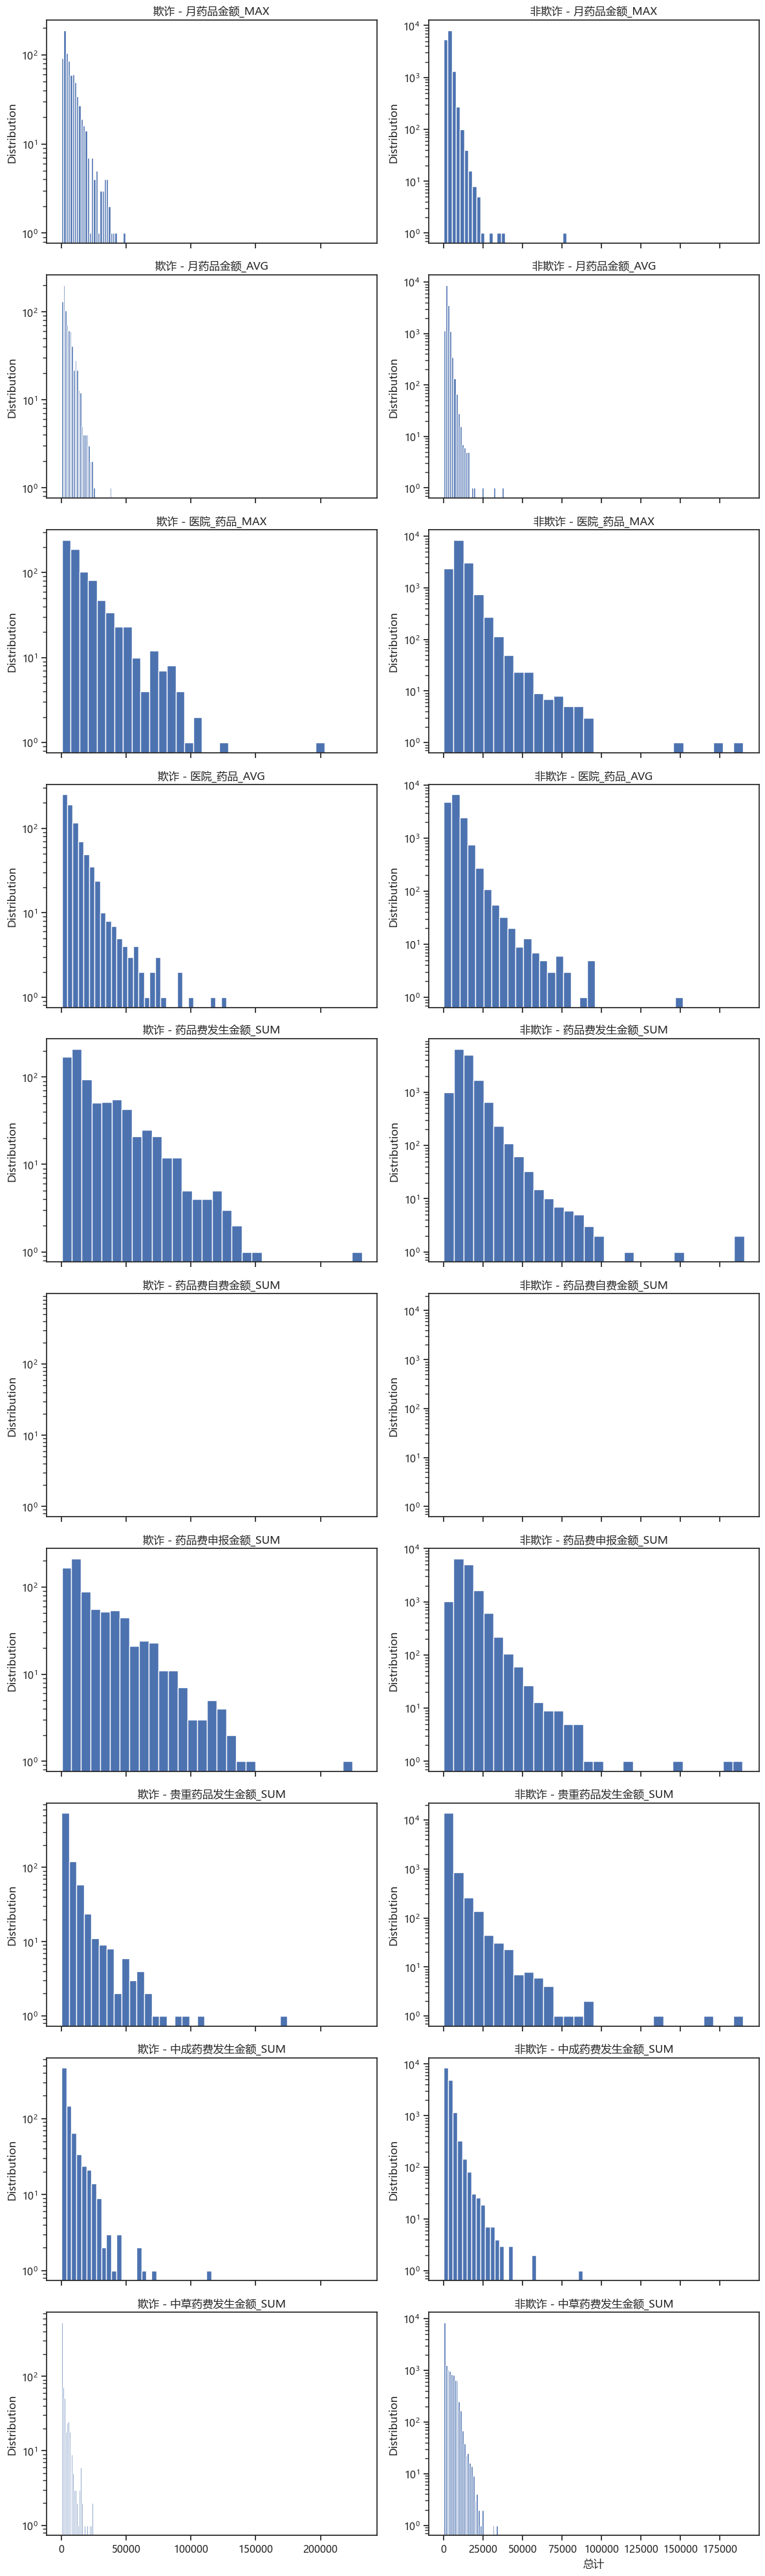

In [15]:
columns_to_visualize = [
    '月药品金额_MAX', '月药品金额_AVG', '医院_药品_MAX', '医院_药品_AVG', '药品费发生金额_SUM',
    '药品费自费金额_SUM', '药品费申报金额_SUM', '贵重药品发生金额_SUM', '中成药费发生金额_SUM',
    '中草药费发生金额_SUM'
]

# 为每个特征创建子绘图
fig, axes = plt.subplots(nrows=len(columns_to_visualize), ncols=2, figsize=(12, 4*len(columns_to_visualize)), sharex='col')
bins = 30


# 绘制每个特征的直方图
for i, col in enumerate(columns_to_visualize):
    # Histogram for fraudulent cases
    axes[i, 0].hist(data[col][data['RES'] == 1].values, bins=bins)
    axes[i, 0].set_title(f"欺诈 - {col}")
    axes[i, 0].set_ylabel("Distribution")
    axes[i, 0].set_yscale('log')

    #非欺诈案件的柱状图
    axes[i, 1].hist(data[col][data['RES'] == 0].values, bins=bins)
    axes[i, 1].set_title(f"非欺诈 - {col}")
    axes[i, 1].set_ylabel("Distribution")
    axes[i, 1].set_yscale('log')

# 设置常用的 x 标签
plt.xlabel("总计")
plt.tight_layout()
plt.show()

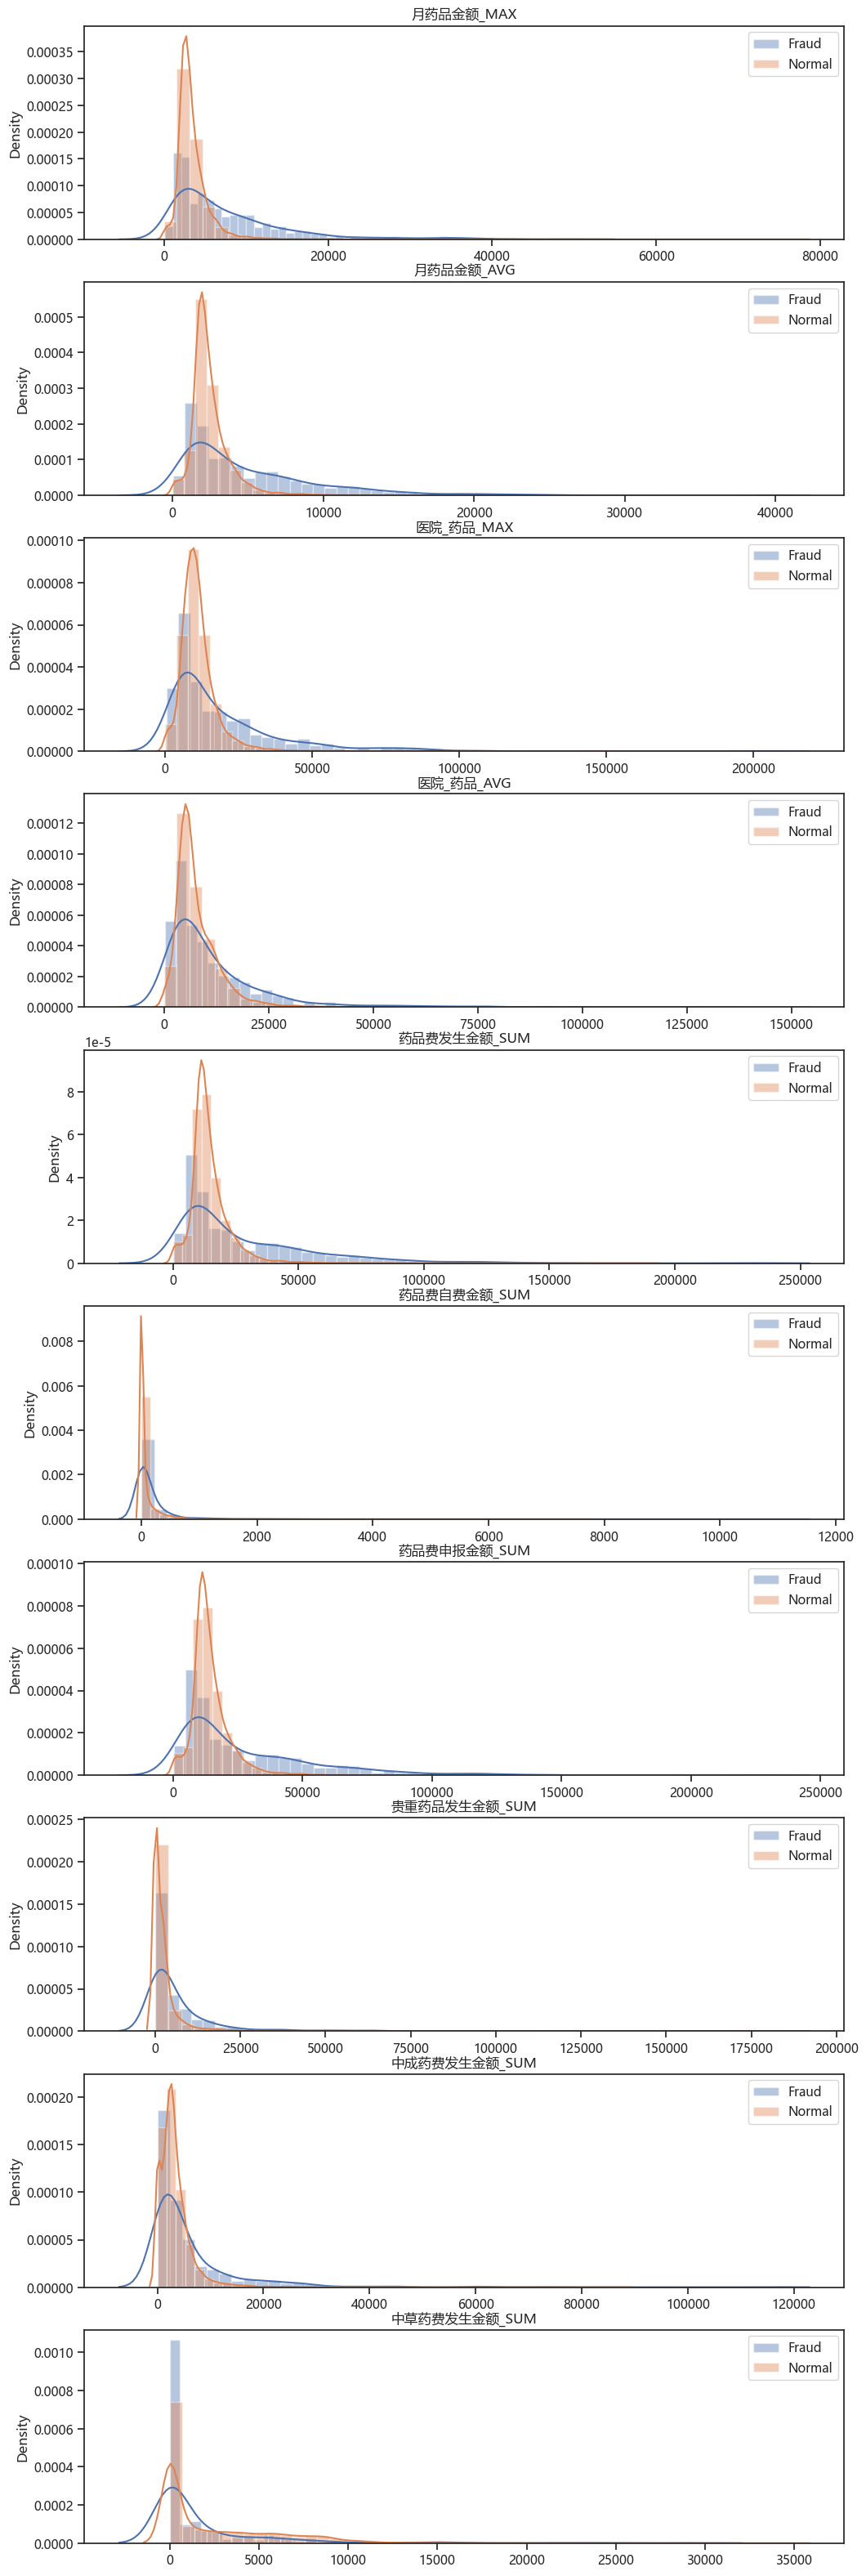

In [16]:
## 不同类别下的分布

import ipywidgets as widgets
from IPython.display import display
import matplotlib.gridspec as gridspec

selected_features = [
    '月药品金额_MAX', '月药品金额_AVG', '医院_药品_MAX', '医院_药品_AVG', '药品费发生金额_SUM',
    '药品费自费金额_SUM', '药品费申报金额_SUM', '贵重药品发生金额_SUM', '中成药费发生金额_SUM',
    '中草药费发生金额_SUM'
]

# Creating subplots for each selected feature
plt.figure(figsize=(12, len(selected_features) * 4))
gs = gridspec.GridSpec(len(selected_features), 1)
bins = 50

for i, feature in enumerate(selected_features):
    ax = plt.subplot(gs[i])
    sns.distplot(data[feature][data['RES'] == 1].values, bins=bins, label='Fraud', kde=True, norm_hist=True)
    sns.distplot(data[feature][data['RES'] == 0].values, bins=bins, label='Normal', kde=True, norm_hist=True)
    ax.set_xlabel('')
    ax.set_title(f'{feature}')
    ax.legend()

plt.show()

**图表分析**

月药品金额_MAX（月最高药品金额）：此图表比较了欺诈案例和非欺诈案例的月最高药品金额。欺诈分布中的特定模式或异常值可能表明这些案例中存在异常的支出行为。

月药品金额_AVG（月平均药品金额）：显示月平均药品金额。两组之间平均支出的差异可能表明，与正常案例相比，欺诈案例在药品使用上要么大大过量，要么大大不足。
- 与出院诊断结合成新特征，部分小病可能存在药物过量

医院_药品_MAX（每次医院访问的最高药品金额）：表示每次医院访问的最高药品金额。欺诈案例中较高的最大值可能表明存在过度收费或过度开药的情况。

医院_药品_AVG（每次医院访问的平均药品金额）：与最高金额类似，但侧重于平均值，此图表揭示两组之间每次医院访问的典型成本差异。

药品费发生金额_SUM（药品总费用）：代表药品总费用。这里的大差异可能是欺诈的强有力指标，尤其是如果欺诈案例的费用明显更高的话。

药品费自费金额_SUM（药品自付总费用）：患者自己支付的总金额。这里的模式可能表明欺诈案例是否更可能涉及更高的自付费用。

药品费申报金额_SUM（药品申报总费用）：从保险或报销中申报的总金额。这里的差异在识别欺诈活动（如过度申报）方面可能至关重要。

贵重药品发生金额_SUM（贵重药品总费用）：显示在更昂贵的药品上的支出。欺诈案例中异常高的值可能表明高成本药物的滥用或过度使用。

中成药费发生金额_SUM（中成药总费用）：关注中成药的费用。显著的差异可能表明与这类药品相关的特定欺诈模式。

中草药费发生金额_SUM（中草药总费用）：与中成药类似，这里的任何不寻常模式可能表明涉及中草药的欺诈活动。

In [17]:
grouped = data.groupby(['出院诊断病种名称_NN'])
stats = grouped['ALL_SUM'].describe()
print(stats)

              count           mean           std       min          25%  \
出院诊断病种名称_NN                                                               
0             355.0   12738.029014  13506.242417     12.60    1672.4000   
1              50.0   14379.604000  13417.367397      4.00    6254.7000   
2            1742.0   15007.041309  11369.225859     47.83   10126.5850   
3            2063.0   16718.986103  11385.556721    132.73   11066.8900   
4            2683.0   16346.983559   9794.650327    527.04   11501.5200   
5            2669.0   16946.796253  10296.737428   1594.08   11814.3500   
6            1979.0   17855.835265  11242.810858   1389.42   12415.8200   
7            1552.0   18864.092822  11894.085716   2017.76   12682.1250   
8             984.0   20889.058171  13309.464270   3853.68   13636.0000   
9             656.0   22376.271311  13013.109298   4980.28   14549.9525   
10            449.0   26203.296013  17268.970546   6230.08   16319.7200   
11            283.0   294

### 总体费用

In [18]:
# 利用ALL_SUM统计计算其异常值

category_0_data = df[df['RES'] == 0]
category_1_data = df[df['RES'] == 1]

# Calculate IQR for 'ALL_SUM' in category 0 data
Q1 = category_0_data['ALL_SUM'].quantile(0.25)
Q3 = category_0_data['ALL_SUM'].quantile(0.75)
IQR = Q3 - Q1

# 定义离群值的下限和上限
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 识别异常值
outliers = category_0_data[(category_0_data['ALL_SUM'] < lower_bound) | (category_0_data['ALL_SUM'] > upper_bound)]
outlier_count = outliers.shape[0]

outlier_count, lower_bound, upper_bound

(1095, -260.68500000000313, 32268.315000000006)

In [19]:
# 为第 1 类数据计算 "ALL_SUM
category_1_data['ALL_SUM'] = category_1_data['个人账户金额_SUM'] + category_1_data['统筹支付金额_SUM']

# Identify outliers in category 1 data using the IQR from category 0 data
category_1_outliers = category_1_data[(category_1_data['ALL_SUM'] < lower_bound) | (category_1_data['ALL_SUM'] > upper_bound)]
category_1_outlier_count = category_1_outliers.shape[0]

category_1_outlier_count

351

In [20]:
# 计算个人账户使用异常指数
data['个人账户使用异常指数'] = data['可用账户报销金额_SUM'] / data['个人账户金额_SUM']

# 为了避免除以零的错误，将个人账户金额为零的记录的异常指数设为NaN
data['个人账户使用异常指数'] = data['个人账户使用异常指数'].replace([float('inf'), -float('inf')], float('nan'))

# 检查计算结果的分布
account_usage_summary = data['个人账户使用异常指数'].describe()

account_usage_summary

count    16000.000000
mean         0.944487
std          0.094698
min          0.000000
25%          0.936498
50%          0.984567
75%          0.997029
max          1.000000
Name: 个人账户使用异常指数, dtype: float64

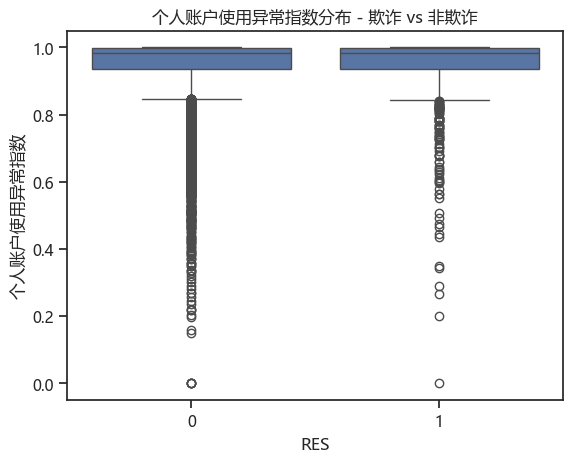

In [21]:
# 可视化两个类别的个人账户使用异常指数
sns.boxplot(x='RES', y='个人账户使用异常指数', data=data)
plt.title('个人账户使用异常指数分布 - 欺诈 vs 非欺诈')
plt.show()


正常行为（'RES' = 0）：这一类别中，个人账户使用异常指数大多数集中在0.9到1的区域。这表明在这个群体中，大部分人的可用账户报销金额与个人账户金额的比例相对较高，表现出一致性。

潜在欺诈行为（'RES' = 1）：相比之下，这个类别中的指数分布似乎有更大的波动，尽管仍然大多数集中在0.9到1的区域。

数据分布情况：需要注意的是，'RES' = 1 的数据量相对较少（793条相对于15207条），这可能影响了分析的可靠性。这种数据不平衡的情况在实际的欺诈检测任务中很常见。

从可视化结果来看，虽然两个类别在个人账户使用异常指数上的分布有所不同，但区别并不十分显著。

### 三目明细比例

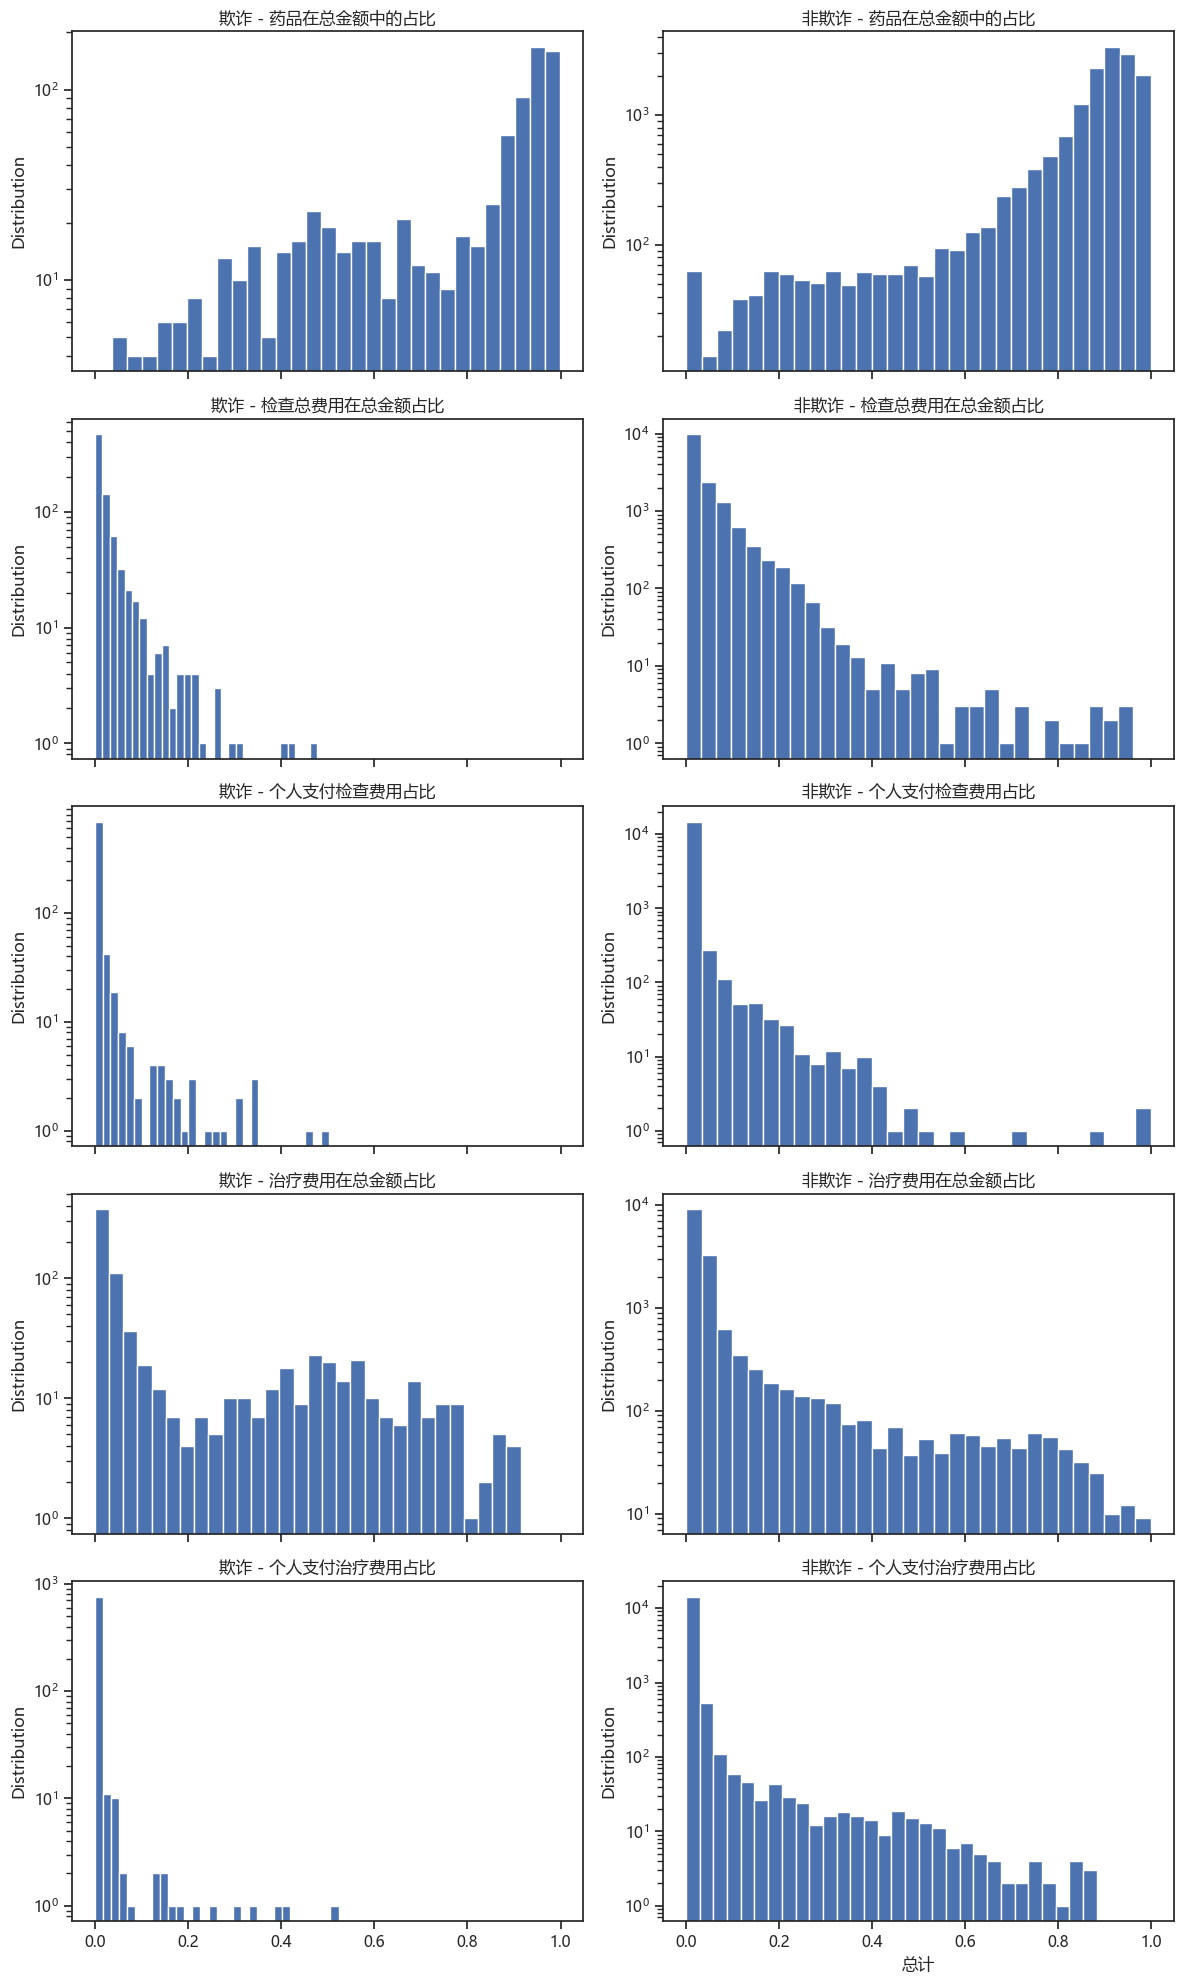

In [22]:
columns_to_visualize_s = ['药品在总金额中的占比','检查总费用在总金额占比',
                          '个人支付检查费用占比','治疗费用在总金额占比',
                          '个人支付治疗费用占比',]

# 为每个特征创建子绘图
fig, axes = plt.subplots(nrows=len(columns_to_visualize_s), ncols=2, figsize=(12, 4*len(columns_to_visualize_s)), sharex='col')
bins = 30

# 绘制每个特征的直方图
for i, col in enumerate(columns_to_visualize_s):
    # Histogram for fraudulent cases
    axes[i, 0].hist(data[col][data['RES'] == 1].values, bins=bins)
    axes[i, 0].set_title(f"欺诈 - {col}")
    axes[i, 0].set_ylabel("Distribution")
    axes[i, 0].set_yscale('log')

    # 非欺诈案件的柱状图
    axes[i, 1].hist(data[col][data['RES'] == 0].values, bins=bins)
    axes[i, 1].set_title(f"非欺诈 - {col}")
    axes[i, 1].set_ylabel("Distribution")
    axes[i, 1].set_yscale('log')

# 设置常用 x 标签
plt.xlabel("总计")
plt.tight_layout()
plt.show()

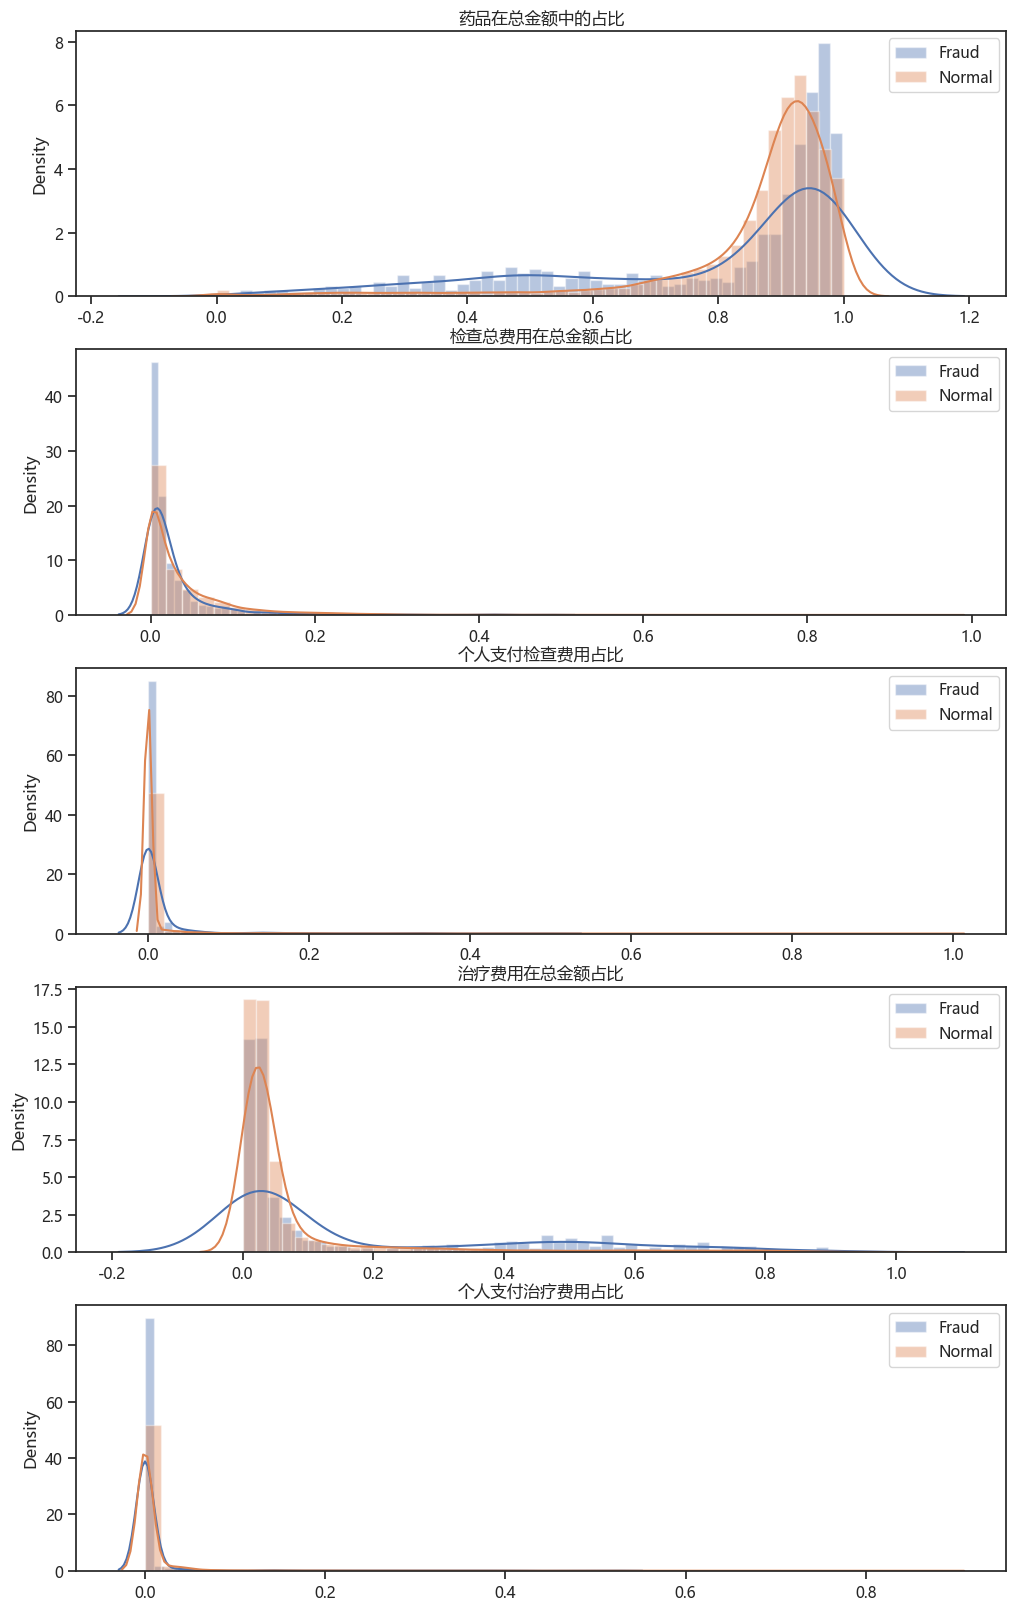

In [23]:
selected_features_s = ['药品在总金额中的占比','检查总费用在总金额占比',
                     '个人支付检查费用占比','治疗费用在总金额占比',
                     '个人支付治疗费用占比',
]

# 为每个选定的特征创建子绘图
plt.figure(figsize=(12, len(selected_features_s) * 4))
gs = gridspec.GridSpec(len(selected_features_s), 1)
bins = 50

for i, feature in enumerate(selected_features_s):
    ax = plt.subplot(gs[i])
    sns.distplot(data[feature][data['RES'] == 1].values, bins=bins, label='Fraud', kde=True, norm_hist=True)
    sns.distplot(data[feature][data['RES'] == 0].values, bins=bins, label='Normal', kde=True, norm_hist=True)
    ax.set_xlabel('')
    ax.set_title(f'{feature}')
    ax.legend()

plt.show()

In [24]:
average_res_0 = data[data['RES'] == 0]['起付线标准金额_MAX'].mean()

# 计算 RES 类别 0 和 1 中 "起付线标准金额_MAX "高于 RES 类别 0 平均值的记录数
count_above_avg_res_0 = data[(data['起付线标准金额_MAX'] > average_res_0) & (data['RES'] == 0)].shape[0]
count_above_avg_res_1 = data[(data['起付线标准金额_MAX'] > average_res_0) & (data['RES'] == 1)].shape[0]

average_res_0, count_above_avg_res_0, count_above_avg_res_1

(7.299927664891168, 84, 9)

In [25]:
features_to_analyze = [
    "起付标准以上自负比例金额_SUM", "医疗救助个人按比例负担金额_SUM", 
    "最高限额以上金额_SUM", "基本统筹基金支付金额_SUM"
]

# 存储结果的字典
analysis_results = {}

# 计算每个特征的平均值，并统计每个 RES 类别中超过平均值的记录数
for feature in features_to_analyze:
    average_res_0 = data[data['RES'] == 0][feature].mean()
    count_above_avg_res_0 = data[(data[feature] > average_res_0) & (data['RES'] == 0)].shape[0]
    count_above_avg_res_1 = data[(data[feature] > average_res_0) & (data['RES'] == 1)].shape[0]
    analysis_results[feature] = {
        "Average for RES Category 0": average_res_0,
        "Count above average in RES 0": count_above_avg_res_0,
        "Count above average in RES 1": count_above_avg_res_1
    }

analysis_results

{'起付标准以上自负比例金额_SUM': {'Average for RES Category 0': 2159.4594745840727,
  'Count above average in RES 0': 4156,
  'Count above average in RES 1': 462},
 '医疗救助个人按比例负担金额_SUM': {'Average for RES Category 0': 31.889539028079177,
  'Count above average in RES 0': 129,
  'Count above average in RES 1': 147},
 '最高限额以上金额_SUM': {'Average for RES Category 0': 0.08326297100019728,
  'Count above average in RES 0': 1,
  'Count above average in RES 1': 0},
 '基本统筹基金支付金额_SUM': {'Average for RES Category 0': 14931.06116393766,
  'Count above average in RES 0': 5559,
  'Count above average in RES 1': 450}}

In [26]:
iqr_values = {}
for feature in features_to_analyze:
    q1 = data[data['RES'] == 0][feature].quantile(0.25)
    q3 = data[data['RES'] == 0][feature].quantile(0.75)
    iqr = q3 - q1
    iqr_values[feature] = {'Q1': q1, 'Q3': q3, 'IQR': iqr, 'Upper Bound': q3 + 1.5 * iqr}

# 计算 RES 类别 0 和 1 中每个特征超过上限（异常值）的条目的数量
outlier_counts = {}
for feature in features_to_analyze:
    upper_bound = iqr_values[feature]['Upper Bound']
    count_res_0_outliers = data[(data[feature] > upper_bound) & (data['RES'] == 0)].shape[0]
    count_res_1_outliers = data[(data[feature] > upper_bound) & (data['RES'] == 1)].shape[0]
    outlier_counts[feature] = {'Count in RES 0': count_res_0_outliers, 'Count in RES 1': count_res_1_outliers}

outlier_counts

{'起付标准以上自负比例金额_SUM': {'Count in RES 0': 1548, 'Count in RES 1': 358},
 '医疗救助个人按比例负担金额_SUM': {'Count in RES 0': 130, 'Count in RES 1': 148},
 '最高限额以上金额_SUM': {'Count in RES 0': 1, 'Count in RES 1': 0},
 '基本统筹基金支付金额_SUM': {'Count in RES 0': 957, 'Count in RES 1': 312}}

## 出院诊断统计

In [27]:
df['医院编码_NN'].value_counts()

医院编码_NN
2    6343
1    4389
3    3607
4    1211
5     329
6      83
7      30
8       5
9       3
Name: count, dtype: int64

In [28]:
df['出院诊断病种名称_NN'].value_counts()

出院诊断病种名称_NN
4     2683
5     2669
3     2063
6     1979
2     1742
7     1552
8      984
9      656
10     449
0      355
11     283
12     180
13     132
14      64
1       50
15      49
16      32
17      30
19      12
18      10
22       5
20       4
23       3
24       3
32       3
21       3
25       2
39       1
34       1
28       1
Name: count, dtype: int64

In [29]:
df['出院诊断LENTH_MAX'].value_counts()

出院诊断LENTH_MAX
22.0    669
30.0    584
21.0    557
26.0    533
20.0    525
28.0    500
25.0    492
29.0    466
32.0    465
24.0    465
34.0    454
27.0    446
17.0    436
16.0    427
31.0    421
23.0    405
19.0    399
38.0    383
13.0    358
0.0     355
15.0    351
18.0    335
33.0    332
35.0    327
14.0    304
37.0    291
36.0    287
10.0    282
11.0    273
12.0    241
42.0    241
4.0     230
40.0    223
41.0    211
5.0     200
7.0     179
3.0     166
9.0     162
45.0    159
39.0    154
44.0    144
8.0     142
6.0     133
2.0     128
43.0    119
47.0    111
46.0    109
49.0    107
50.0     95
52.0     91
48.0     84
51.0     59
53.0     49
54.0     47
58.0     45
56.0     33
55.0     33
57.0     31
59.0     24
70.0     21
60.0     19
61.0     16
63.0     14
62.0     13
66.0     12
64.0      9
65.0      9
67.0      6
69.0      4
68.0      3
86.0      1
76.0      1
Name: count, dtype: int64

In [30]:
# 类别为1的数目统计

category_1_data = df[df['RES'] == 1]

# 计算每个指定列的频率
hospital_code_freq = category_1_data['医院编码_NN'].value_counts().sort_index()
diagnosis_name_freq = category_1_data['出院诊断病种名称_NN'].value_counts().sort_index()
diagnosis_length_freq = category_1_data['出院诊断LENTH_MAX'].value_counts().sort_index()

hospital_code_freq, diagnosis_name_freq, diagnosis_length_freq

(医院编码_NN
 1    167
 2    209
 3    222
 4    124
 5     36
 6     19
 7     13
 8      1
 9      2
 Name: count, dtype: int64,
 出院诊断病种名称_NN
 0      28
 1       3
 2      68
 3      78
 4      86
 5     100
 6      59
 7      70
 8      48
 9      30
 10     49
 11     35
 12     29
 13     17
 14     15
 15     22
 16      9
 17     16
 18      5
 19      6
 20      2
 21      3
 22      4
 23      3
 25      2
 28      1
 32      3
 34      1
 39      1
 Name: count, dtype: int64,
 出院诊断LENTH_MAX
 0.0     28
 2.0     12
 3.0      4
 4.0     10
 5.0      9
 6.0      5
 7.0      4
 8.0      9
 9.0      5
 10.0     6
 11.0    12
 12.0    13
 13.0    11
 14.0     6
 15.0    14
 16.0    18
 17.0    18
 18.0    11
 19.0    12
 20.0    21
 21.0    20
 22.0    73
 23.0    11
 24.0    28
 25.0    35
 26.0    25
 27.0    26
 28.0    19
 29.0    24
 30.0    21
 31.0    17
 32.0    12
 33.0    14
 34.0    29
 35.0    26
 36.0     8
 37.0     9
 38.0    39
 39.0    12
 40.0    14
 41.0    10
 42.0 

## 0值占比

In [31]:
# 比例为0的特征不显示
# 分别为欺诈（RES=1）和非欺诈（RES=0）的数据集计算每个特征值为0的数量
fraud_zero_counts = (data[data['RES'] == 1] == 0).sum()
non_fraud_zero_counts = (data[data['RES'] == 0] == 0).sum()

# 计算每个特征值为0的比例
fraud_zero_proportions = fraud_zero_counts / len(data[data['RES'] == 1])
non_fraud_zero_proportions = non_fraud_zero_counts / len(data[data['RES'] == 0])

# 创建两个新的数据框，用于可视化
fraud_zero_proportions_df = pd.DataFrame({'Feature': fraud_zero_proportions.index, 'Zero Proportion': fraud_zero_proportions.values})
non_fraud_zero_proportions_df = pd.DataFrame({'Feature': non_fraud_zero_proportions.index, 'Zero Proportion': non_fraud_zero_proportions.values})

# 过滤掉比例为0的特征
fraud_zero_proportions_df = fraud_zero_proportions_df[fraud_zero_proportions_df['Zero Proportion'] > 0]
non_fraud_zero_proportions_df = non_fraud_zero_proportions_df[non_fraud_zero_proportions_df['Zero Proportion'] > 0]


In [32]:
# 对欺诈数据的零比例进行降序排序
fraud_zero_proportions_df_sorted = fraud_zero_proportions_df.sort_values(by='Zero Proportion', ascending=False)
fraud_zero_proportions_df_sorted.head(10)

,Feature,Zero Proportion
57,最高限额以上金额_SUM,1.000000
24,住院天数_SUM,1.000000
68,城乡优抚补助_SUM,0.998739
50,成分输血申报金额_SUM,0.998739
78,BZ_城乡优抚,0.998739
66,残疾军人补助_SUM,0.998739
52,其它申报金额_SUM,0.997478
43,手术费自费金额_SUM,0.996217
44,手术费申报金额_SUM,0.993695
42,手术费发生金额_SUM,0.991173


In [33]:
non_fraud_zero_proportions_df.sort_values(by='Zero Proportion', ascending=False).head(15)


,Feature,Zero Proportion
80,RES,1.000000
24,住院天数_SUM,1.000000
57,最高限额以上金额_SUM,0.999934
66,残疾军人补助_SUM,0.999671
78,BZ_城乡优抚,0.999474
68,城乡优抚补助_SUM,0.999474
52,其它申报金额_SUM,0.999408
43,手术费自费金额_SUM,0.999014
50,成分输血申报金额_SUM,0.998948
48,高价材料发生金额_SUM,0.995594


In [34]:
data[['住院天数_SUM']].describe()

,住院天数_SUM
count,16000.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


## 费用特征探索

In [35]:
# 统计药品费自费金额_SUM和药品费申报金额_SUM的总和小于药品费发生金额_SUM的记录数
count = data[(data['药品费自费金额_SUM'] + data['药品费申报金额_SUM']) < data['药品费发生金额_SUM']].shape[0]

print("满足条件的记录数：", count)

满足条件的记录数： 11098


In [36]:
# 筛选出类别1的样本
class_1_data = data[data['RES'] == 1]

# 统计满足条件的个数
count = class_1_data[(class_1_data['药品费自费金额_SUM'] + class_1_data['药品费申报金额_SUM']) < class_1_data['药品费发生金额_SUM']].shape[0]

print("满足条件的样本个数：", count)

满足条件的样本个数： 670


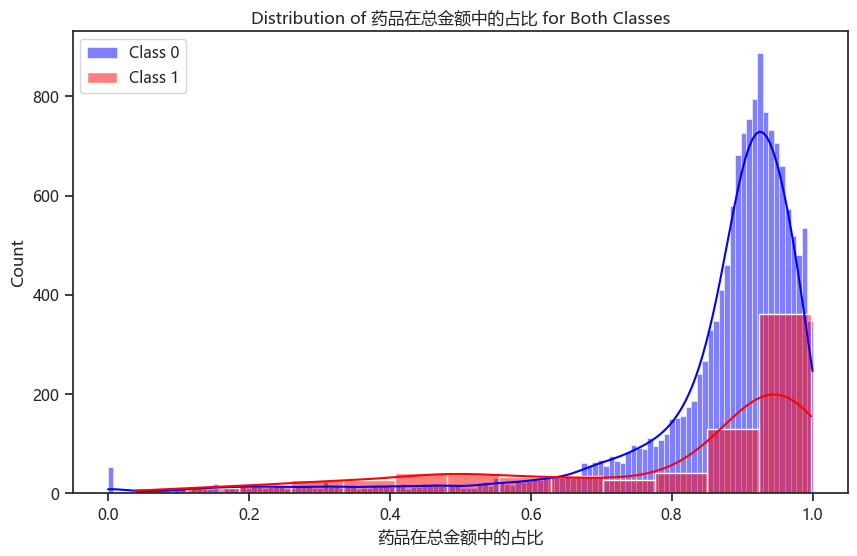

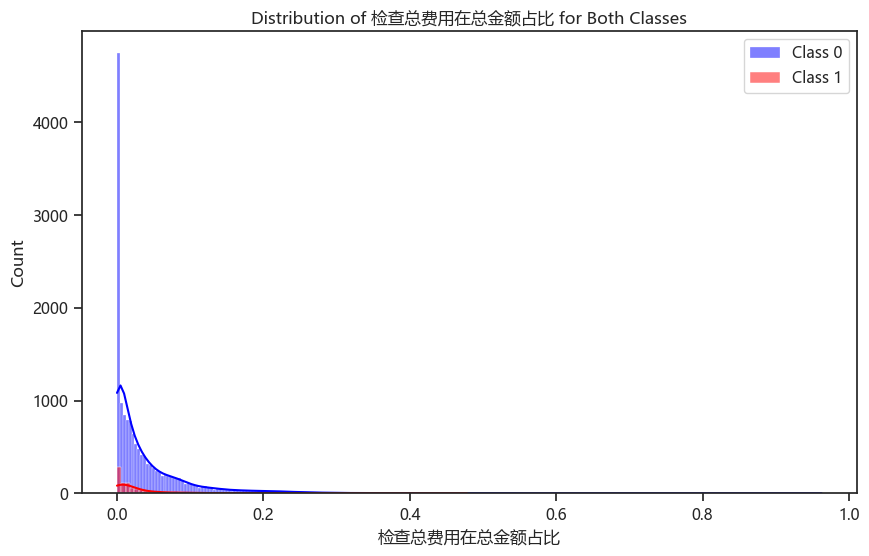

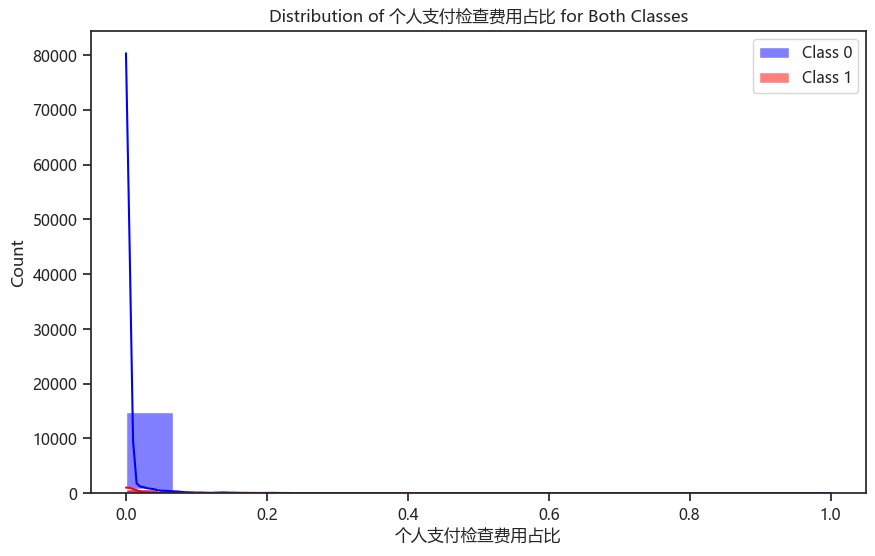

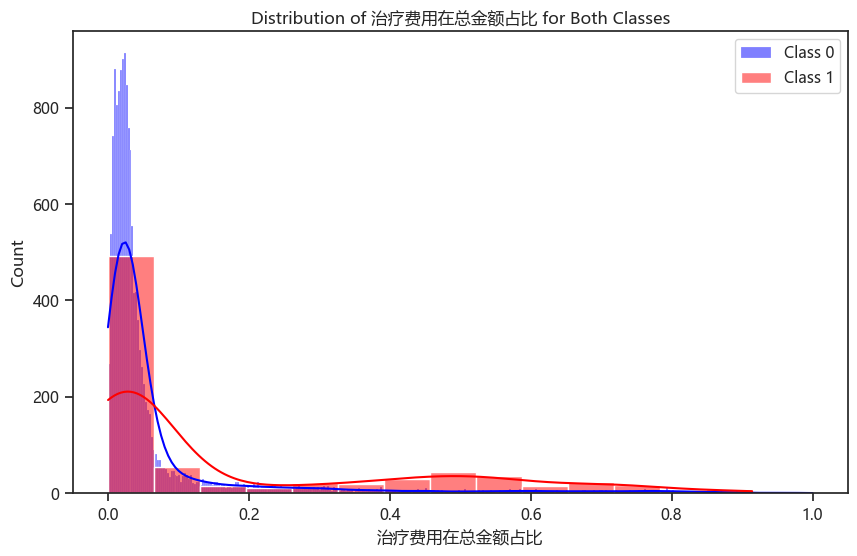

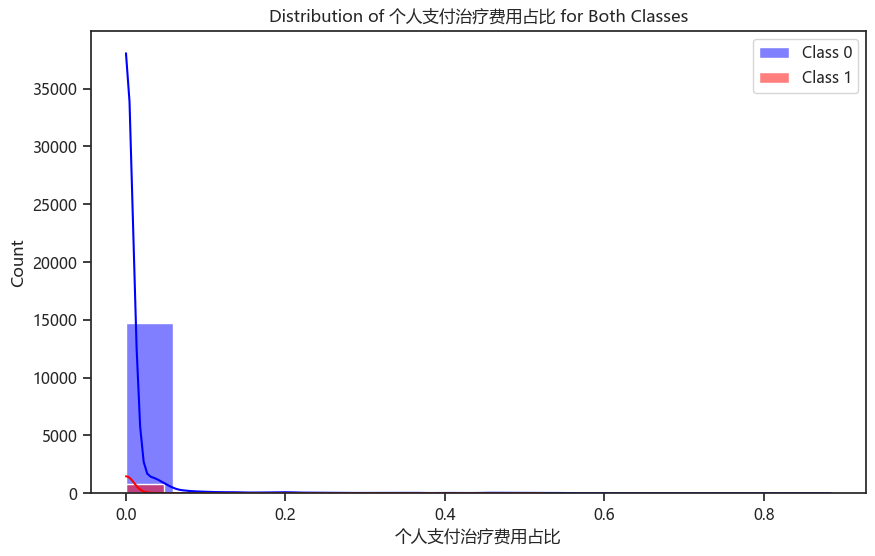

In [37]:
# 设置图表样式
# sns.set(style="whitegrid")

# 指定特征列表
features = ['药品在总金额中的占比', '检查总费用在总金额占比', '个人支付检查费用占比', '治疗费用在总金额占比', '个人支付治疗费用占比']

# 为每个特征分别绘制两个类别的分布图
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[data['RES'] == 0][feature], color='blue', kde=True, label='Class 0')
    sns.histplot(data[data['RES'] == 1][feature], color='red', kde=True, label='Class 1')
    plt.title(f'Distribution of {feature} for Both Classes')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

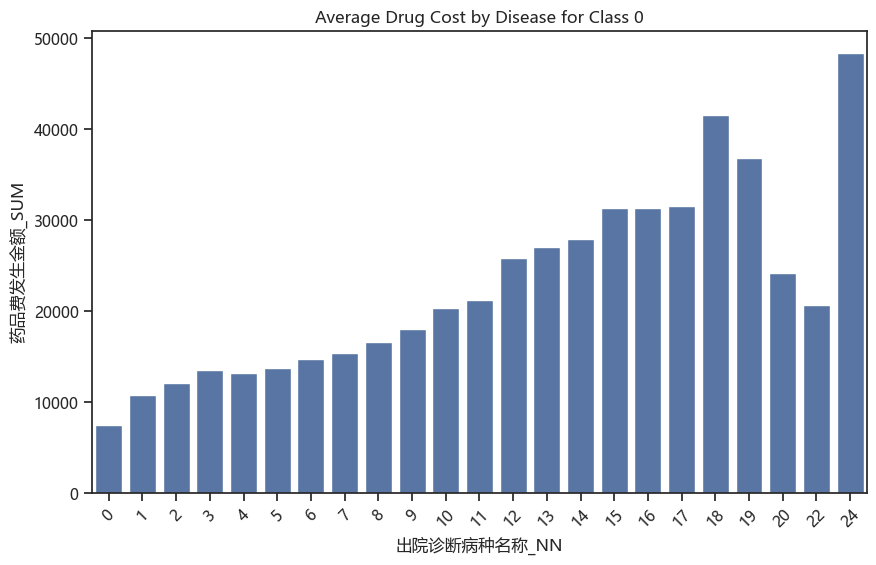

{'药品费发生金额_SUM': 16, '贵重药品发生金额_SUM': 19, '检查费发生金额_SUM': 17}

In [38]:
# 筛选类别为 0 的数据
data_class_0 = data[data['RES'] == 0]

# 计算类别 0 中每个病种的平均费用
average_costs_class_0 = data_class_0.groupby('出院诊断病种名称_NN').mean()[['药品费发生金额_SUM', '贵重药品发生金额_SUM', '检查费发生金额_SUM']]

# 可视化类别 0 中不同病种的平均药品费用
plt.figure(figsize=(10, 6))
sns.barplot(x=average_costs_class_0.index, y="药品费发生金额_SUM", data=average_costs_class_0)
plt.xticks(rotation=45)
plt.title('Average Drug Cost by Disease for Class 0')
plt.show()

# 筛选类别为 1 的数据
data_class_1 = data[data['RES'] == 1]

# 计算类别 1 中每个病种的平均费用
average_costs_class_1 = data_class_1.groupby('出院诊断病种名称_NN').mean()[['药品费发生金额_SUM', '贵重药品发生金额_SUM', '检查费发生金额_SUM']]

# 获取在两个类别中都存在的病种
common_diseases = set(data_class_0['出院诊断病种名称_NN']).intersection(set(data_class_1['出院诊断病种名称_NN']))

# 将 set 转换为 list 以用于索引
common_diseases_list = list(common_diseases)

# 只考虑这些病种
average_costs_class_0_common = average_costs_class_0.loc[common_diseases_list]
average_costs_class_1_common = average_costs_class_1.loc[common_diseases_list]

# 统计类别 1 中超过类别 0 平均值的病种数量
count_above_average = {}
for column in ['药品费发生金额_SUM', '贵重药品发生金额_SUM', '检查费发生金额_SUM']:
    count_above_average[column] = (average_costs_class_1_common[column] > average_costs_class_0_common[column].mean()).sum()

count_above_average



In [39]:
claim_payment_features = [
    "药品费申报金额_SUM", "检查费申报金额_SUM", "治疗费申报金额_SUM",
    "手术费申报金额_SUM", "床位费申报金额_SUM", "其它申报金额_SUM"
]
total_payment_features = [
    "药品费发生金额_SUM", "检查费发生金额_SUM", "治疗费发生金额_SUM",
    "手术费发生金额_SUM", "床位费发生金额_SUM", "其它发生金额_SUM"
]

# 计算每个样本的索赔付款占付款总额的比例
for claim_feature, total_feature in zip(claim_payment_features, total_payment_features):
    data[f'{claim_feature}_占比'] = data[claim_feature] / data[total_feature]
    data[f'{claim_feature}_占比'] = data[f'{claim_feature}_占比'].fillna(0)
#处理付款总额为零的情况
    data[f'{claim_feature}_占比'] = data[f'{claim_feature}_占比'].replace([float('inf'), -float('inf')], 0)

# Optional: Save the result to a new CSV file
data.to_csv('updated_dataset.csv', index=False)



In [40]:
# 计算付款总额为 0，但自付和报销付款不为 0 的记录数
non_zero_counts = {}
for total_feature, claim_feature in zip(total_payment_features, claim_payment_features):
    count_non_zero_claim = data[(data[total_feature] == 0) & (data[claim_feature] != 0)].shape[0]
    non_zero_counts[total_feature] = {
        "Non-Zero Claim Count": count_non_zero_claim
    }

non_zero_counts

{'药品费发生金额_SUM': {'Non-Zero Claim Count': 0},
 '检查费发生金额_SUM': {'Non-Zero Claim Count': 0},
 '治疗费发生金额_SUM': {'Non-Zero Claim Count': 0},
 '手术费发生金额_SUM': {'Non-Zero Claim Count': 0},
 '床位费发生金额_SUM': {'Non-Zero Claim Count': 0},
 '其它发生金额_SUM': {'Non-Zero Claim Count': 0}}

In [41]:
# 需要分析的特征
features_to_analyze = [
    "个人账户金额_SUM", "统筹支付金额_SUM", "ALL_SUM", "可用账户报销金额_SUM", 
    "药品费发生金额_SUM", "药品费自费金额_SUM", "药品费申报金额_SUM", "贵重药品发生金额_SUM",
    "中成药费发生金额_SUM", "中草药费发生金额_SUM", "检查费发生金额_SUM", "检查费自费金额_SUM",
    "检查费申报金额_SUM", "贵重检查费金额_SUM", "治疗费发生金额_SUM", "治疗费自费金额_SUM",
    "治疗费申报金额_SUM", "手术费发生金额_SUM", "手术费自费金额_SUM", "手术费申报金额_SUM",
    "床位费发生金额_SUM", "床位费申报金额_SUM", "医用材料发生金额_SUM", "高价材料发生金额_SUM",
    "医用材料费自费金额_SUM", "成分输血申报金额_SUM", "其它发生金额_SUM", "其它申报金额_SUM",
    "一次性医用材料申报金额_SUM", "起付线标准金额_MAX", "起付标准以上自负比例金额_SUM", "医疗救助个人按比例负担金额_SUM",
    "最高限额以上金额_SUM", "基本统筹基金支付金额_SUM", "公务员医疗补助基金支付金额_SUM", "城乡救助补助金额_SUM",
    "基本个人账户支付_SUM", "非账户支付金额_SUM", "本次审批金额_SUM", "补助审批金额_SUM", 
    "医疗救助医院申请_SUM", "残疾军人补助_SUM", "民政救助补助_SUM", "城乡优抚补助_SUM", 
    "药品在总金额中的占比", "个人支付的药品占比", "检查总费用在总金额占比", "个人支付检查费用占比",
    "治疗费用在总金额占比", "个人支付治疗费用占比", "BZ_民政救助", "BZ_城乡优抚"
]

# 疾病类别特征
disease_feature = "出院诊断病种名称_NN"

# 计算 RES 类别 0 中每种疾病每个特征的平均值
disease_averages = data[data['RES'] == 0].groupby(disease_feature)[features_to_analyze].mean()

# 初始化一个字典，用于存储每个 RES 类别中每种疾病超过平均值的记录数
exceeding_average_counts = {disease: {} for disease in disease_averages.index}

# 初始化一个字典，用于存储每个 RES 类别中每种疾病超过平均值的记录数
for disease in disease_averages.index:
    for feature in features_to_analyze:
        average_value = disease_averages.loc[disease, feature]
        count_res_0_exceeding = data[(data[disease_feature] == disease) & (data['RES'] == 0) & (data[feature] > average_value)].shape[0]
        count_res_1_exceeding = data[(data[disease_feature] == disease) & (data['RES'] == 1) & (data[feature] > average_value)].shape[0]
        exceeding_average_counts[disease][feature] = {"RES 0": count_res_0_exceeding, "RES 1": count_res_1_exceeding}

list(exceeding_average_counts.items())[:5]



[(0,
  {'个人账户金额_SUM': {'RES 0': 103, 'RES 1': 13},
   '统筹支付金额_SUM': {'RES 0': 125, 'RES 1': 18},
   'ALL_SUM': {'RES 0': 128, 'RES 1': 17},
   '可用账户报销金额_SUM': {'RES 0': 100, 'RES 1': 13},
   '药品费发生金额_SUM': {'RES 0': 130, 'RES 1': 16},
   '药品费自费金额_SUM': {'RES 0': 47, 'RES 1': 8},
   '药品费申报金额_SUM': {'RES 0': 132, 'RES 1': 16},
   '贵重药品发生金额_SUM': {'RES 0': 67, 'RES 1': 8},
   '中成药费发生金额_SUM': {'RES 0': 90, 'RES 1': 13},
   '中草药费发生金额_SUM': {'RES 0': 94, 'RES 1': 10},
   '检查费发生金额_SUM': {'RES 0': 91, 'RES 1': 12},
   '检查费自费金额_SUM': {'RES 0': 32, 'RES 1': 6},
   '检查费申报金额_SUM': {'RES 0': 98, 'RES 1': 12},
   '贵重检查费金额_SUM': {'RES 0': 65, 'RES 1': 9},
   '治疗费发生金额_SUM': {'RES 0': 42, 'RES 1': 9},
   '治疗费自费金额_SUM': {'RES 0': 26, 'RES 1': 4},
   '治疗费申报金额_SUM': {'RES 0': 42, 'RES 1': 9},
   '手术费发生金额_SUM': {'RES 0': 3, 'RES 1': 0},
   '手术费自费金额_SUM': {'RES 0': 0, 'RES 1': 0},
   '手术费申报金额_SUM': {'RES 0': 3, 'RES 1': 0},
   '床位费发生金额_SUM': {'RES 0': 16, 'RES 1': 6},
   '床位费申报金额_SUM': {'RES 0': 16, 'RES 1'

### 费用分布--直方图

In [42]:
features = data.columns[26:70]

def plot_histogram(feature):
    # 原始数据分布
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    data[feature].hist(bins=200, color='orange')
    plt.title(f'Original Histogram: {feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(False)

    # 对数变换
    log_transformed = np.log1p(data[feature] + 1e-9) 


    plt.subplot(1, 2, 2)
    log_transformed.hist(bins=200, color='orange')
    plt.title(f'Log Transformed Histogram: {feature}')
    plt.xlabel('log(Value)')
    plt.ylabel('Frequency')
    plt.grid(False)

    plt.show()

In [43]:
interact(plot_histogram, feature=features)

interactive(children=(Dropdown(description='feature', options=('统筹支付金额_SUM', 'ALL_SUM', '可用账户报销金额_SUM', '药品费发生…

<function __main__.plot_histogram(feature)>

### 费用分布--小提琴

In [44]:
# features = data.columns[26:70]
features = data.columns[9:20].tolist() + data.columns[26:68].tolist()

def plot_violin(feature):
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=data['RES'], y=data[feature])
    plt.title(f'{feature}')
    plt.xlabel('RES')
    plt.ylabel(feature)
    plt.show()


dropdown = Dropdown(options=features)
interact(plot_violin, feature=dropdown)

interactive(children=(Dropdown(description='feature', options=('月统筹金额_MAX', '月统筹金额_AVG', '月药品金额_MAX', '月药品金额_A…

<function __main__.plot_violin(feature)>

In [45]:
specified_features_mean =data.columns[26:69].tolist()

# 类别为0的费用特征均值
class_0_data = data[data['RES'] == 0]
class_0_mean = class_0_data[specified_features_mean].mean()
class_0_mean

统筹支付金额_SUM           15554.351199
ALL_SUM              17538.405795
可用账户报销金额_SUM          2046.556829
药品费发生金额_SUM          14604.246548
药品费自费金额_SUM             76.621660
药品费申报金额_SUM          14373.851475
贵重药品发生金额_SUM          2485.758351
中成药费发生金额_SUM          3266.477386
中草药费发生金额_SUM          2424.308565
检查费发生金额_SUM            588.386348
检查费自费金额_SUM              9.335477
检查费申报金额_SUM            571.979003
贵重检查费金额_SUM             58.852436
治疗费发生金额_SUM           2025.959173
治疗费自费金额_SUM              8.339504
治疗费申报金额_SUM           1995.725028
手术费发生金额_SUM              7.656671
手术费自费金额_SUM              0.072993
手术费申报金额_SUM              7.582922
床位费发生金额_SUM              5.056652
床位费申报金额_SUM              5.012790
医用材料发生金额_SUM           299.367100
高价材料发生金额_SUM            14.252362
医用材料费自费金额_SUM            8.917600
成分输血申报金额_SUM            10.158217
其它发生金额_SUM               7.733303
其它申报金额_SUM               0.041823
一次性医用材料申报金额_SUM        263.423845
起付线标准金额_MAX              7.299928
起付标准以上自负比例金额_S

In [46]:
# 总体样本费用均值
specified_features_mean_value = data[specified_features_mean].mean()
specified_features_mean_value

统筹支付金额_SUM           16248.157033
ALL_SUM              18581.903839
可用账户报销金额_SUM          2200.475267
药品费发生金额_SUM          15275.711085
药品费自费金额_SUM             80.603902
药品费申报金额_SUM          15023.718634
贵重药品发生金额_SUM          2709.672334
中成药费发生金额_SUM          3401.571010
中草药费发生金额_SUM          2389.157068
检查费发生金额_SUM            598.063251
检查费自费金额_SUM             10.267001
检查费申报金额_SUM            580.508156
贵重检查费金额_SUM             60.580062
治疗费发生金额_SUM           2385.897406
治疗费自费金额_SUM              8.733015
治疗费申报金额_SUM           2348.499072
手术费发生金额_SUM              7.891188
手术费自费金额_SUM              0.090000
手术费申报金额_SUM              7.800469
床位费发生金额_SUM              5.195688
床位费申报金额_SUM              5.150125
医用材料发生金额_SUM           301.377911
高价材料发生金额_SUM            17.197364
医用材料费自费金额_SUM           10.763950
成分输血申报金额_SUM            10.078250
其它发生金额_SUM               7.767312
其它申报金额_SUM               0.048625
一次性医用材料申报金额_SUM        263.894079
起付线标准金额_MAX              7.405927
起付标准以上自负比例金额_S

In [47]:
# 不同病种下药品发生费均值
data.groupby('出院诊断病种名称_NN')['药品费发生金额_SUM'].mean()

出院诊断病种名称_NN
0      7904.208479
1     10327.223000
2     12163.570689
3     13523.169971
4     13241.009892
5     13863.333185
6     15031.852360
7     15976.145857
8     17455.188780
9     18709.971098
10    22110.869889
11    24726.010212
12    29202.984389
13    30330.035985
14    34354.892344
15    38293.931633
16    36096.326875
17    46910.000667
18    56339.118000
19    45119.680000
20    40579.640000
21    74699.333333
22    45514.596000
23    63259.846667
24    48379.950000
25    97863.105000
28    22660.590000
32    81262.423333
34    72318.590000
39    71185.030000
Name: 药品费发生金额_SUM, dtype: float64

In [48]:
# feature_mean_values_ = data.groupby('出院诊断病种名称_NN')[specified_features_mean].describe()
# feature_mean_values.head()

## 交易时间

In [49]:
specified_columns = ['交易时间DD_NN', '交易时间YYYY_NN', '交易时间YYYYMM_NN', '就诊的月数']
present_columns = [col for col in specified_columns if col in data.columns]

unique_counts = {col: data[col].nunique() for col in present_columns} if present_columns else {}

present_columns, unique_counts  # 种类数

(['交易时间DD_NN', '交易时间YYYY_NN', '交易时间YYYYMM_NN', '就诊的月数'],
 {'交易时间DD_NN': 148, '交易时间YYYY_NN': 1, '交易时间YYYYMM_NN': 7, '就诊的月数': 7})

In [50]:
category_counts = {col: data[col].value_counts() for col in present_columns}

# 不同种类下个数
category_counts

{'交易时间DD_NN': 交易时间DD_NN
 26     537
 27     472
 25     461
 24     435
 13     422
       ... 
 173      1
 153      1
 171      1
 159      1
 172      1
 Name: count, Length: 148, dtype: int64,
 '交易时间YYYY_NN': 交易时间YYYY_NN
 1    16000
 Name: count, dtype: int64,
 '交易时间YYYYMM_NN': 交易时间YYYYMM_NN
 6    14571
 5      720
 4      278
 3      182
 2      134
 1      112
 7        3
 Name: count, dtype: int64,
 '就诊的月数': 就诊的月数
 6    14571
 5      720
 4      278
 3      182
 2      134
 1      112
 7        3
 Name: count, dtype: int64}

# 相关性分析

## 互信息

- 优点：能够捕捉变量之间的任何类型的关系，不限于线性关系，适用于连续和离散变量。
- 
缺点：对于大数据集计算可能较为复杂
- 
使用场景：特征选择和变量之间关系的复杂性评估，如在分类问题中评估特征与类别标签之间的相关性。

In [51]:
# 分离特征变量和目标变量
X = data.drop('RES', axis=1)
y = data['RES']

mutual_info = mutual_info_classif(X, y)



In [52]:
mutual_info

array([1.57108605e-02, 7.91689656e-03, 3.22662517e-02, 3.13016254e-02,
       7.37018766e-03, 5.48646539e-03, 3.06558685e-02, 3.39132579e-02,
       3.36006641e-02, 4.52127553e-02, 3.66803416e-02, 3.53465126e-02,
       3.94146963e-02, 2.14923259e-02, 1.57977139e-02, 2.57304708e-02,
       9.82359311e-03, 2.64232630e-02, 1.18071401e-02, 9.60421378e-03,
       3.52327789e-02, 2.94035843e-02, 3.22660067e-03, 4.31778884e-03,
       5.51002478e-04, 2.99099197e-02, 3.78528407e-02, 4.71708662e-02,
       2.58720785e-02, 3.81541701e-02, 5.09391304e-03, 3.37006090e-02,
       1.32731698e-02, 1.02557177e-02, 5.05307039e-03, 1.63836409e-03,
       3.42218425e-03, 2.27969733e-03, 1.94521931e-03, 1.80532698e-02,
       1.47788166e-03, 1.63505392e-02, 8.99128226e-05, 1.39335678e-03,
       0.00000000e+00, 2.02285579e-03, 7.52804705e-05, 6.92767353e-03,
       8.54230538e-04, 4.02757015e-03, 0.00000000e+00, 4.93273192e-03,
       1.58479808e-03, 2.24345524e-03, 0.00000000e+00, 3.80326151e-02,
      

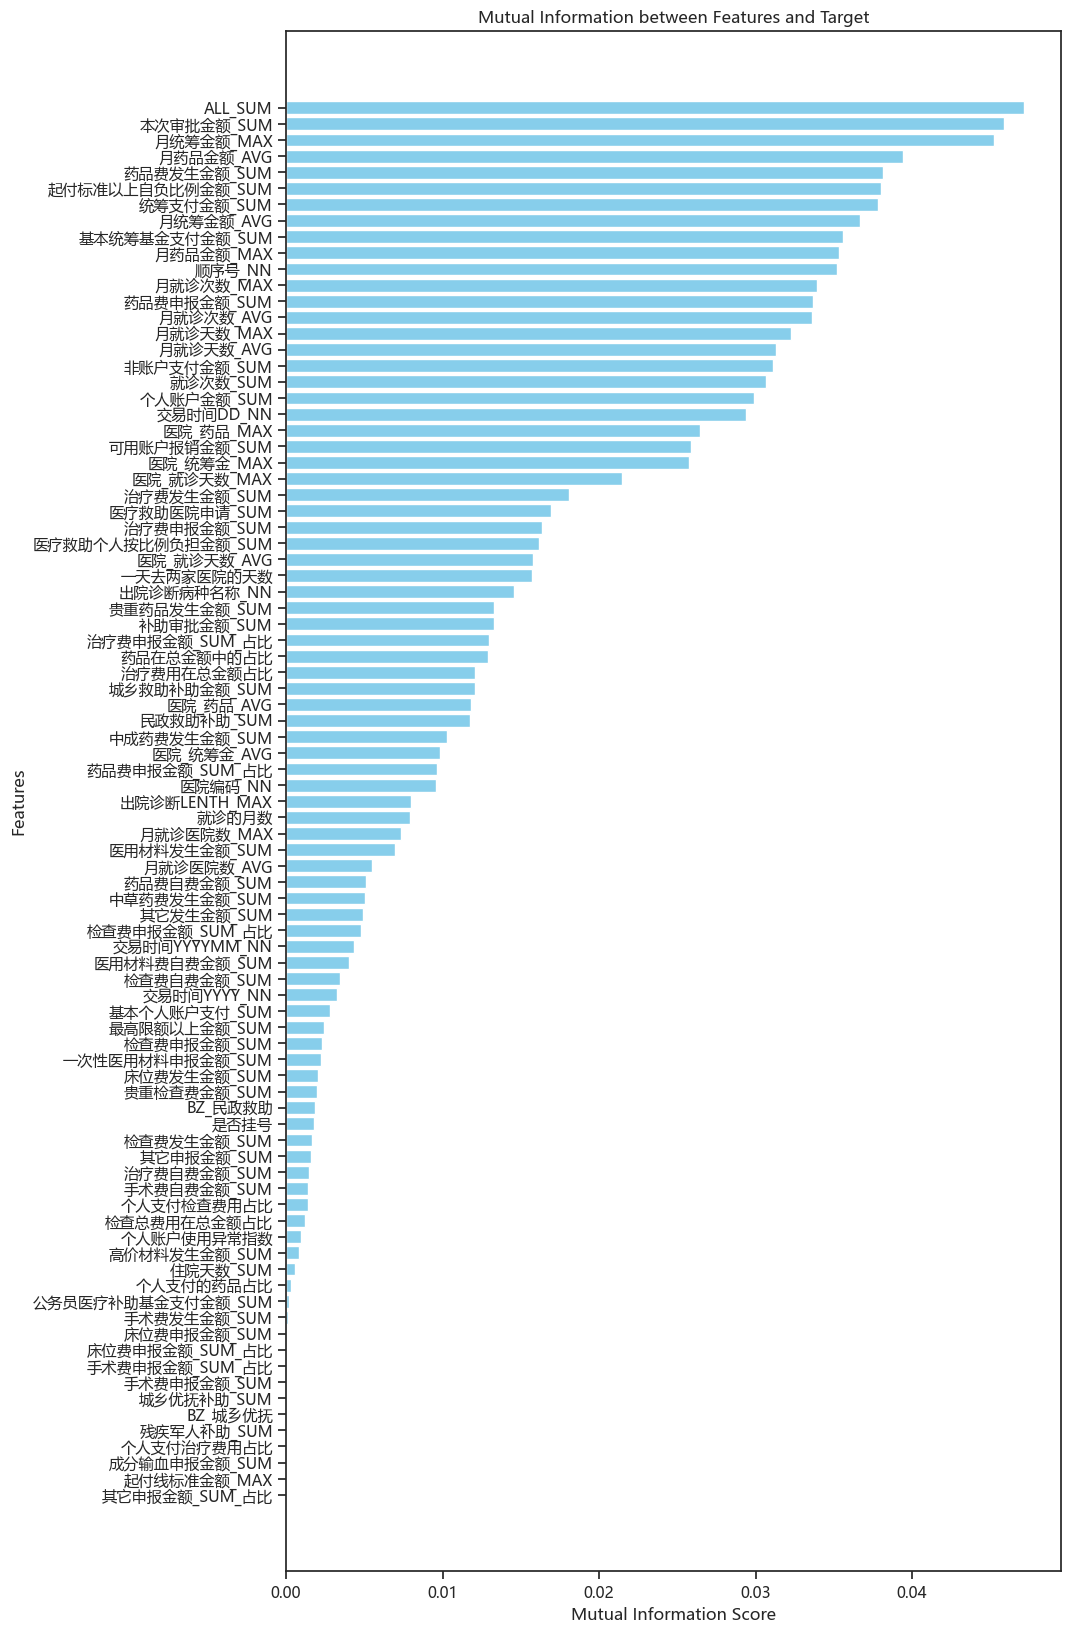

,Mutual Information Score
ALL_SUM,0.047171
本次审批金额_SUM,0.045902
月统筹金额_MAX,0.045213
月药品金额_AVG,0.039415
药品费发生金额_SUM,0.038154
起付标准以上自负比例金额_SUM,0.038033
统筹支付金额_SUM,0.037853
月统筹金额_AVG,0.036680
基本统筹基金支付金额_SUM,0.035562
月药品金额_MAX,0.035347


In [53]:
# 为互信息得分创建数据帧，包括特征名称
mutual_info_df = pd.DataFrame(mutual_info, index=X.columns, columns=['Mutual Information Score'])

# 按降序排列分数
mutual_info_sorted = mutual_info_df.sort_values(by='Mutual Information Score', ascending=False)

# 绘制
plt.figure(figsize=(10, 20))
plt.barh(mutual_info_sorted.index, mutual_info_sorted['Mutual Information Score'], color='skyblue')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Mutual Information between Features and Target')
plt.gca().invert_yaxis() #要在顶部显示最高分。
plt.show()

# 返回按特征名称排序的互信息得分
mutual_info_sorted

## 斯皮尔曼等级相关系数

- 优点：不要求数据正态分布，适用于序数和非线性关系的分析。

- 缺点：只能检测单调关系，可能不如皮尔逊相关系数敏感。
敏感。

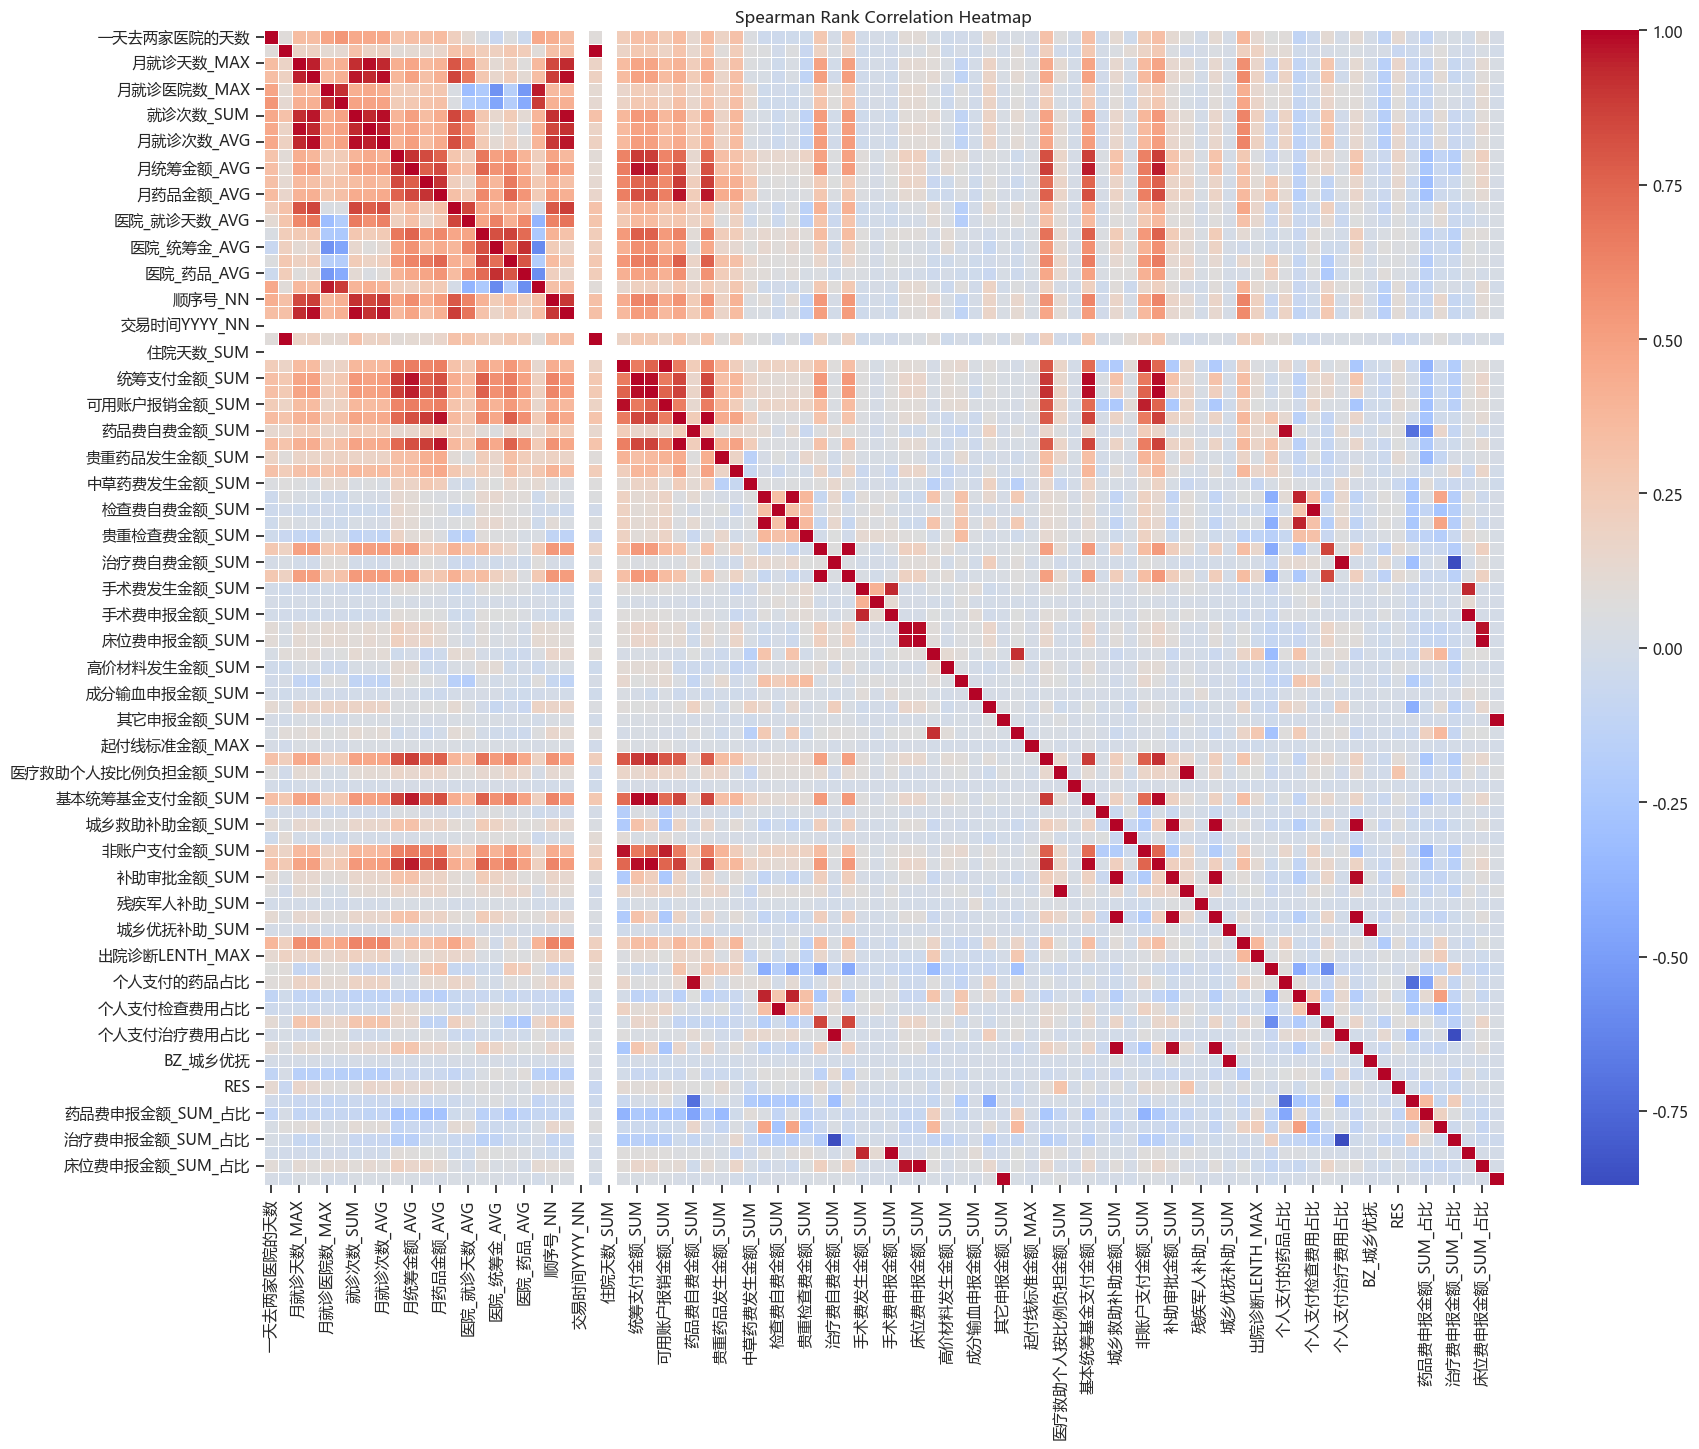

In [54]:
# 计算斯皮尔曼等级相关系数
spearman_corr = data.corr(method='spearman')

# 绘制热力图以可视化相关性
plt.figure(figsize=(20, 15))
sns.heatmap(spearman_corr, cmap='coolwarm', annot=False, linewidths=.5)
plt.title('Spearman Rank Correlation Heatmap')
plt.show()

In [55]:
# 返回相关系数数值
spearman_corr.head()  # 显示部分相关性数值，以便查看结果格式

,一天去两家医院的天数,就诊的月数,月就诊天数_MAX,月就诊天数_AVG,月就诊医院数_MAX,月就诊医院数_AVG,就诊次数_SUM,月就诊次数_MAX,月就诊次数_AVG,月统筹金额_MAX,月统筹金额_AVG,月药品金额_MAX,月药品金额_AVG,医院_就诊天数_MAX,医院_就诊天数_AVG,医院_统筹金_MAX,医院_统筹金_AVG,医院_药品_MAX,医院_药品_AVG,医院编码_NN,顺序号_NN,交易时间DD_NN,交易时间YYYY_NN,交易时间YYYYMM_NN,住院天数_SUM,个人账户金额_SUM,统筹支付金额_SUM,ALL_SUM,可用账户报销金额_SUM,药品费发生金额_SUM,药品费自费金额_SUM,药品费申报金额_SUM,贵重药品发生金额_SUM,中成药费发生金额_SUM,中草药费发生金额_SUM,检查费发生金额_SUM,检查费自费金额_SUM,检查费申报金额_SUM,贵重检查费金额_SUM,治疗费发生金额_SUM,治疗费自费金额_SUM,治疗费申报金额_SUM,手术费发生金额_SUM,手术费自费金额_SUM,手术费申报金额_SUM,床位费发生金额_SUM,床位费申报金额_SUM,医用材料发生金额_SUM,高价材料发生金额_SUM,医用材料费自费金额_SUM,成分输血申报金额_SUM,其它发生金额_SUM,其它申报金额_SUM,一次性医用材料申报金额_SUM,起付线标准金额_MAX,起付标准以上自负比例金额_SUM,医疗救助个人按比例负担金额_SUM,最高限额以上金额_SUM,基本统筹基金支付金额_SUM,公务员医疗补助基金支付金额_SUM,城乡救助补助金额_SUM,基本个人账户支付_SUM,非账户支付金额_SUM,本次审批金额_SUM,补助审批金额_SUM,医疗救助医院申请_SUM,残疾军人补助_SUM,民政救助补助_SUM,城乡优抚补助_SUM,出院诊断病种名称_NN,出院诊断LENTH_MAX,药品在总金额中的占比,个人支付的药品占比,检查总费用在总金额占比,个人支付检查费用占比,治疗费用在总金额占比,个人支付治疗费用占比,BZ_民政救助,BZ_城乡优抚,是否挂号,RES,个人账户使用异常指数,药品费申报金额_SUM_占比,检查费申报金额_SUM_占比,治疗费申报金额_SUM_占比,手术费申报金额_SUM_占比,床位费申报金额_SUM_占比,其它申报金额_SUM_占比
一天去两家医院的天数,1.000000,0.084153,0.344112,0.336584,0.481109,0.546596,0.452818,0.454358,0.454435,0.298474,0.329199,0.325917,0.352338,0.214669,0.113717,0.035303,-0.069848,0.053981,-0.050682,0.456578,0.424760,0.335995,NaN,0.084153,NaN,0.238318,0.332507,0.329401,0.244624,0.354862,0.136918,0.356745,0.187712,0.318112,0.043018,-0.038286,-0.042782,-0.037394,-0.033369,0.270967,0.005360,0.274843,-0.012492,0.004031,-0.012727,0.095287,0.095050,0.019827,-0.027001,-0.020861,-0.008043,0.115877,0.006306,0.025581,0.011692,0.314202,0.071338,-0.003891,0.328688,-0.025058,0.121819,-0.030459,0.242809,0.331778,0.121142,0.070985,-0.009533,0.121846,0.000447,0.381300,0.124663,0.058952,0.082714,-0.117017,-0.042989,0.114579,-0.000923,0.111352,0.000442,-0.114039,0.128686,-0.020952,-0.109407,0.013614,0.020454,-0.012698,0.095003,0.006293
就诊的月数,0.084153,1.000000,0.177892,0.201465,0.116925,0.129903,0.320169,0.177925,0.201751,0.094291,0.119637,0.128134,0.157845,0.309420,0.293671,0.234535,0.204301,0.271785,0.236959,0.093382,0.321539,0.323802,NaN,1.000000,NaN,0.179938,0.273243,0.260781,0.183590,0.302779,0.138782,0.305560,0.083051,0.236887,0.066792,0.051861,-0.020664,0.053745,-0.068364,0.194678,0.022943,0.197629,-0.025562,-0.015509,-0.019177,0.020758,0.022562,0.089367,-0.033485,0.007034,-0.024663,0.049141,-0.015779,0.090440,-0.022377,0.221109,-0.016517,-0.023997,0.276018,0.001279,0.037342,0.106412,0.175034,0.264522,0.037953,-0.016341,0.006032,0.036907,0.007389,0.207463,0.189051,0.081117,0.103583,-0.025099,-0.021112,0.007580,0.020614,0.033096,0.007389,0.006755,-0.069563,-0.041896,0.010897,0.073868,-0.004775,-0.019258,0.022548,-0.015771
月就诊天数_MAX,0.344112,0.177892,1.000000,0.950718,0.392132,0.417992,0.924909,0.979539,0.941060,0.427133,0.472339,0.364176,0.401240,0.801688,0.609307,0.257546,0.111711,0.200943,0.074229,0.364607,0.840245,0.932679,NaN,0.177892,NaN,0.351783,0.478237,0.474832,0.347778,0.406210,0.232559,0.409989,0.167049,0.318173,0.052332,0.022308,-0.031389,0.024164,-0.090172,0.495190,-0.013174,0.502637,-0.020189,0.000975,-0.018666,0.111152,0.114601,0.089449,0.027978,-0.102830,-0.003777,0.177145,0.027079,0.082635,0.029762,0.446819,0.114019,-0.003342,0.476565,-0.021079,0.136888,-0.003711,0.356965,0.480889,0.136465,0.113427,-0.004498,0.136649,0.005054,0.581990,0.155902,-0.081980,0.178493,-0.108782,-0.029798,0.288283,-0.022915,0.120994,0.005052,-0.164446,0.155719,-0.067656,-0.110559,0.084720,-0.077273,-0.018685,0.114572,0.027076
月就诊天数_AVG,0.336584,0.201465,0.950718,1.000000,0.369093,0.420879,0.968574,0.934883,0.985060,0.381817,0.489678,0.323833,0.422232,0.857479,0.672939,0.282297,0.147690,0.228525,0.114023,0.335408,0.880134,0.981607,NaN,0.201465,NaN,0.354353,0.495175,0.489434,0.352393,0.426941,0.241956,0.431615,0.165401,0.330115,0.025856,0.020511,-0.044012,0.022724,-0.123928,0.499372,-0.018061,0.507691,-0.030157,-0.001390,-0.028826,0.081601,0.085587,0.112761,0.027132,-0.125141,-0.011782,0.168891,0.027177,0.108850,0.030264,0.453366,0.107941,-0.006075,0.494934,-0

In [56]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 聚类

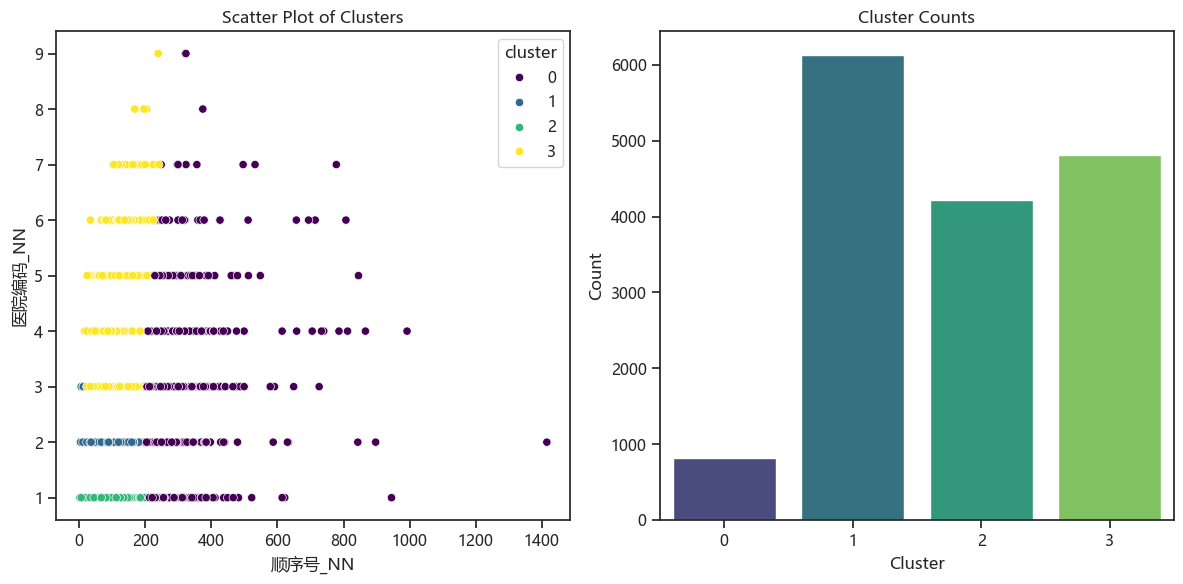

RES,0,1
cluster,,
0,558,264
1,5984,153
2,4097,127
3,4568,249


In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 选取并标准化特征
features = data[['顺序号_NN', '医院编码_NN']].values
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 应用k-means聚类
kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

# 可视化聚类效果
plt.figure(figsize=(12, 6))

# 散点图
plt.subplot(1, 2, 1)
sns.scatterplot(x='顺序号_NN', y='医院编码_NN', hue='cluster', data=data, palette='viridis')
plt.title('Scatter Plot of Clusters')
plt.xlabel('顺序号_NN')
plt.ylabel('医院编码_NN')

# 计数图
plt.subplot(1, 2, 2)
sns.countplot(x='cluster', data=data, palette='viridis')
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 计算每个聚类中“RES”的分布
cluster_counts = data.groupby(['cluster', 'RES']).size().unstack(fill_value=0)
cluster_counts